In [1]:
library(DESeq2)
library(ggplot2)
library(reshape2)
library(patchwork)
library(ggrepel)
library(cowplot)
library(grid)
library(RColorBrewer)
library(repr) 
library(glmpca)
library(pheatmap)
library(PoiClaClu)
library(apeglm)
library(ashr)
library(vsn)
library(dplyr)
library(tidyr)
library(viridis)  
library("pheatmap")
library("ReportingTools")
library("BiocParallel")
library(glmpca)
library(emdbook)  
library(tidyverse)
register(MulticoreParam(4))
library(sva)
library(RUVSeq)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb



In [2]:
# Load count data
count_data <- read.csv("A549_peak_counts.txt", 
                       skip = 1, sep="\t", header=TRUE, stringsAsFactors=FALSE)  

head(count_data,2 )

# Remove the ".genomicAllAligned.sorted.bam" suffix from column names
colnames(count_data) <- sub("\\.CLAM.genomicAllAligned\\.sorted\\.bam$", "", colnames(count_data))
head(count_data, 2)
colnames(count_data)

colnames(count_data) <- sub("^([^\\.]+)\\..*", "\\1", colnames(count_data))
head(count_data, 2)
colnames(count_data, 2)

Geneid          Chr                 Start                  
1 ENSG00000290825 chr1;chr1;chr1;chr1 14621;14721;19121;19221
2 ENSG00000310526 chr1;chr1;chr1;chr1 14656;14756;19156;19256
  End                     Strand  Length
1 14721;14821;19221;19321 +;+;+;+ 402   
2 14756;14856;19256;19356 -;-;-;- 402   
  AC1_IP.AC1_IP.CLAM.genomicAllAligned.sorted.bam
1 3                                              
2 0                                              
  AC1_NP.AC1_NP.CLAM.genomicAllAligned.sorted.bam
1 1                                              
2 0                                              
  AC2_IP.AC2_IP.CLAM.genomicAllAligned.sorted.bam
1 0                                              
2 0                                              
  AC2_NP.AC2_NP.CLAM.genomicAllAligned.sorted.bam
1 2                                              
2 2                                              
  AP1_IP.AP1_IP.CLAM.genomicAllAligned.sorted.bam
1 0                                              
2 3                                              
  AP1_NP.AP1_NP.CLAM.genomicAllAligned.sorted.bam
1 0                                              
2 0                                              
  AP2_IP.AP2_IP.CLAM.genomicAllAligned.sorted.bam
1 0                                              
2 0                                              
  AP2_NP.AP2_NP.CLAM.genomicAllAligned.sorted.bam
1 0                                              
2 0                                              
  AV1_IP.AV1_IP.CLAM.genomicAllAligned.sorted.bam
1 2                                              
2 0                                              
  AV1_NP.AV1_NP.CLAM.genomicAllAligned.sorted.bam
1 1                                              
2 1                                              
  AV2_IP.AV2_IP.CLAM.genomicAllAligned.sorted.bam
1 0                                              
2 0                                              
  AV2_NP.AV2_NP.CLAM.genomicAllAligned.sorted.bam
1 0                                              
2 0

Geneid          Chr                 Start                  
1 ENSG00000290825 chr1;chr1;chr1;chr1 14621;14721;19121;19221
2 ENSG00000310526 chr1;chr1;chr1;chr1 14656;14756;19156;19256
  End                     Strand  Length AC1_IP.AC1_IP AC1_NP.AC1_NP
1 14721;14821;19221;19321 +;+;+;+ 402    3             1            
2 14756;14856;19256;19356 -;-;-;- 402    0             0            
  AC2_IP.AC2_IP AC2_NP.AC2_NP AP1_IP.AP1_IP AP1_NP.AP1_NP AP2_IP.AP2_IP
1 0             2             0             0             0            
2 0             2             3             0             0            
  AP2_NP.AP2_NP AV1_IP.AV1_IP AV1_NP.AV1_NP AV2_IP.AV2_IP AV2_NP.AV2_NP
1 0             2             1             0             0            
2 0             0             1             0             0

[1] "Geneid"        "Chr"           "Start"         "End"          
 [5] "Strand"        "Length"        "AC1_IP.AC1_IP" "AC1_NP.AC1_NP"
 [9] "AC2_IP.AC2_IP" "AC2_NP.AC2_NP" "AP1_IP.AP1_IP" "AP1_NP.AP1_NP"
[13] "AP2_IP.AP2_IP" "AP2_NP.AP2_NP" "AV1_IP.AV1_IP" "AV1_NP.AV1_NP"
[17] "AV2_IP.AV2_IP" "AV2_NP.AV2_NP"

Geneid          Chr                 Start                  
1 ENSG00000290825 chr1;chr1;chr1;chr1 14621;14721;19121;19221
2 ENSG00000310526 chr1;chr1;chr1;chr1 14656;14756;19156;19256
  End                     Strand  Length AC1_IP AC1_NP AC2_IP AC2_NP AP1_IP
1 14721;14821;19221;19321 +;+;+;+ 402    3      1      0      2      0     
2 14756;14856;19256;19356 -;-;-;- 402    0      0      0      2      3     
  AP1_NP AP2_IP AP2_NP AV1_IP AV1_NP AV2_IP AV2_NP
1 0      0      0      2      1      0      0     
2 0      0      0      0      1      0      0

[1] "Geneid" "Chr"    "Start"  "End"    "Strand" "Length" "AC1_IP" "AC1_NP"
 [9] "AC2_IP" "AC2_NP" "AP1_IP" "AP1_NP" "AP2_IP" "AP2_NP" "AV1_IP" "AV1_NP"
[17] "AV2_IP" "AV2_NP"

In [3]:
count_data2 <- count_data %>%
  mutate(
    Chr = sapply(strsplit(Chr, ";"), `[`, 1),
    Start = sapply(strsplit(Start, ";"), function(x) min(as.integer(x))),
    End = sapply(strsplit(End, ";"), function(x) max(as.integer(x)))
  )

colnames(count_data2)
head(count_data2, 2)  

[1] "Geneid" "Chr"    "Start"  "End"    "Strand" "Length" "AC1_IP" "AC1_NP"
 [9] "AC2_IP" "AC2_NP" "AP1_IP" "AP1_NP" "AP2_IP" "AP2_NP" "AV1_IP" "AV1_NP"
[17] "AV2_IP" "AV2_NP"

Geneid          Chr  Start End   Strand  Length AC1_IP AC1_NP AC2_IP AC2_NP
1 ENSG00000290825 chr1 14621 19321 +;+;+;+ 402    3      1      0      2     
2 ENSG00000310526 chr1 14656 19356 -;-;-;- 402    0      0      0      2     
  AP1_IP AP1_NP AP2_IP AP2_NP AV1_IP AV1_NP AV2_IP AV2_NP
1 0      0      0      0      2      1      0      0     
2 3      0      0      0      0      1      0      0

In [4]:
# Select _IP columns + Geneid
ip <- count_data2 %>% select(Geneid, ends_with("_IP"))
head(ip, 2)

# Select _NP columns + Geneid
np <- count_data2 %>% select(Geneid, ends_with("_NP"))
head(np, 2)

Geneid          AC1_IP AC2_IP AP1_IP AP2_IP AV1_IP AV2_IP
1 ENSG00000290825 3      0      0      0      2      0     
2 ENSG00000310526 0      0      3      0      0      0

Geneid          AC1_NP AC2_NP AP1_NP AP2_NP AV1_NP AV2_NP
1 ENSG00000290825 1      2      0      0      1      0     
2 ENSG00000310526 0      2      0      0      1      0

In [5]:
print("!!!")

[1] "!!!"


In [6]:
print("In this analysis, we focus on RNA-seq data that overlaps with peak regions. For simplicity, we assign the variable ip to nip.")

[1] "In this analysis, we focus on RNA-seq data that overlaps with peak regions. For simplicity, we assign the variable ip to nip."


In [7]:
print("!!!")

[1] "!!!"


In [8]:
print("DESeq2 to measure the differential binding across non-IP samples (RNA-seq) :")

[1] "DESeq2 to measure the differential binding across non-IP samples (RNA-seq) :"


In [9]:
# Step 1: Select only columns ending with "_NP" and include Geneid for rownames

print("!!! _NP")

ip <- count_data2 %>%
  select(Geneid, ends_with("_NP"))

# Step 2: Set Geneid as rownames and remove Geneid column
rownames(ip) <- ip$Geneid
ip <- ip[, -1]

# Step 3: Verify column names
sample_names <- colnames(ip)
print(sample_names)

# Step 4: Assign condition groups (AC, AP, AV)
conditions <- ifelse(grepl("^AC", sample_names), "AC",
              ifelse(grepl("^AP", sample_names), "AP",
              ifelse(grepl("^AV", sample_names), "AV", NA)))
print(conditions)

# Step 5: Error handling if any unrecognized sample names
if (any(is.na(conditions))) {
  stop("Some sample names do not match expected patterns (AC, AP, AV). Check column names!")
}

# Step 6: Create colData
col_data <- data.frame(
  row.names = sample_names,
  condition = factor(conditions, levels = c("AC", "AP", "AV"))
)
print("col data:")
print(col_data)

# Step 7: Remove rows with NA values
dim(ip)
ip <- ip[complete.cases(ip), ]
dim(ip)

# Step 8: Compute summary statistics directly on ip (only numeric columns)
summary_stats <- data.frame(
  Median = apply(ip, 2, median, na.rm = TRUE),
  Min    = apply(ip, 2, min, na.rm = TRUE),
  Max    = apply(ip, 2, max, na.rm = TRUE)
)

# Step 9: Print the result
print(summary_stats)

[1] "!!! _NP"
[1] "AC1_NP" "AC2_NP" "AP1_NP" "AP2_NP" "AV1_NP" "AV2_NP"
[1] "AC" "AC" "AP" "AP" "AV" "AV"
[1] "col data:"
       condition
AC1_NP        AC
AC2_NP        AC
AP1_NP        AP
AP2_NP        AP
AV1_NP        AV
AV2_NP        AV


[1] 11828     6

[1] 11828     6

       Median Min    Max
AC1_NP   99.0   0 180293
AC2_NP  111.0   0 128386
AP1_NP   51.5   0  87342
AP2_NP   39.0   0  56964
AV1_NP  170.0   0 504805
AV2_NP  124.0   0 411936


In [10]:
# Create DESeq2 dataset
dds <- DESeqDataSetFromMatrix(countData = ip, colData = col_data, design = ~condition)

# Set reference level for condition (AV will be the baseline)
dds$condition <- relevel(dds$condition, ref = "AV")

# Print number of genes before filtering
cat("Number of genes before filtering:", nrow(dds), "\n")

# Estimate size factors (required for normalization)
dds <- estimateSizeFactors(dds)

# Filter: keep genes with normalized count >= 4 in at least 4 samples
keep <- rowSums(counts(dds, normalized = TRUE) >= 4) >= 4
dds <- dds[keep, ]

# Print number of genes after filtering
cat("Number of genes after filtering:", nrow(dds), "\n")

# Run DESeq2 differential expression analysis
dds <- DESeq(dds)

# Extract results table
# res <- results(dds) 
# it will produce : Wald test p-value: condition AC vs AV 

# View summary of results
# cat("First row of DE results:\n")
# print(head(res, 1))
# cat("Last row of DE results:\n")
# print(tail(res, 1))
# cat("Summary of DESeq2 results:\n")
# print(summary(res))

# Show contrast names
cat("Available result contrasts:\n")
print(resultsNames(dds))

# Size factors (re-estimation here is harmless but redundant)
cat("The size factors are:\n")
print(sizeFactors(dds))

# Extract normalized counts
norm_counts <- counts(dds, normalized = TRUE)

# Preview normalized counts
cat("Preview of normalized counts:\n")
print(head(norm_counts, 2))

# Save normalized counts to CSV
write.csv(norm_counts, "A549.peaks.nonIP.samples.normalized.counts.csv", row.names = TRUE)

# Compute summary statistics for each sample (column)
summary_stats2 <- data.frame(
  Median = apply(norm_counts, 2, median, na.rm = TRUE),
  Min    = apply(norm_counts, 2, min, na.rm = TRUE),
  Max    = apply(norm_counts, 2, max, na.rm = TRUE)
)

# Print summary statistics
cat("Summary of the normalized counts:\n")
print(round(summary_stats2, 2))

# Show available assays in the DESeqDataSet
cat("Available assays in dds:\n")
print(names(assays(dds)))

# View fitted means (mu) and Cook's distances
cat("DESeq2 fitted means (mu):\n")
print(head(assay(dds, "mu"), 2))

cat("DESeq2 Cook's distances (cooks):\n")
print(head(assay(dds, "cooks"), 2))

Number of genes before filtering: 11828 
Number of genes after filtering: 9926 


using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



Available result contrasts:
[1] "Intercept"          "condition_AC_vs_AV" "condition_AP_vs_AV"
The size factors are:
   AC1_NP    AC2_NP    AP1_NP    AP2_NP    AV1_NP    AV2_NP 
1.1702662 1.2646608 0.6044499 0.4609352 1.7948441 1.4007098 
Preview of normalized counts:
                   AC1_NP   AC2_NP    AP1_NP   AP2_NP    AV1_NP   AV2_NP
ENSG00000310528  9.399571 16.60524  8.271985 15.18652  9.471575 10.70886
ENSG00000310527 32.471245 36.37339 26.470351 28.20353 30.643331 27.12910
Summary of the normalized counts:
       Median Min      Max
AC1_NP 124.76   0 154061.5
AC2_NP 129.68   0 101518.1
AP1_NP 127.39   0 144498.3
AP2_NP 128.00   0 123583.5
AV1_NP 138.73   0 281252.8
AV2_NP 134.22   0 294090.9
Available assays in dds:
[1] "counts" "mu"     "H"      "cooks" 
DESeq2 fitted means (mu):
                  AC1_NP   AC2_NP    AP1_NP    AP2_NP   AV1_NP   AV2_NP
ENSG00000310528 15.24734 16.47720  6.982534  5.324669 18.08434 14.11316
ENSG00000310527 40.29876 43.54929 16.496758 12.579929 

In [11]:
# Extract raw (unnormalized) counts
print("raw counts")
raw_counts <- counts(dds, normalized = FALSE)
head(raw_counts, 2)

# Extract normalized counts
print("norm counts")
norm_counts <- counts(dds, normalized = TRUE)
head(norm_counts, 2)

[1] "raw counts"


AC1_NP AC2_NP AP1_NP AP2_NP AV1_NP AV2_NP
ENSG00000310528 11     21      5      7     17     15    
ENSG00000310527 38     46     16     13     55     38

[1] "norm counts"


AC1_NP    AC2_NP   AP1_NP    AP2_NP   AV1_NP    AV2_NP  
ENSG00000310528  9.399571 16.60524  8.271985 15.18652  9.471575 10.70886
ENSG00000310527 32.471245 36.37339 26.470351 28.20353 30.643331 27.12910

[1] "Boxplot of Raw vs log2 Normalized Counts"


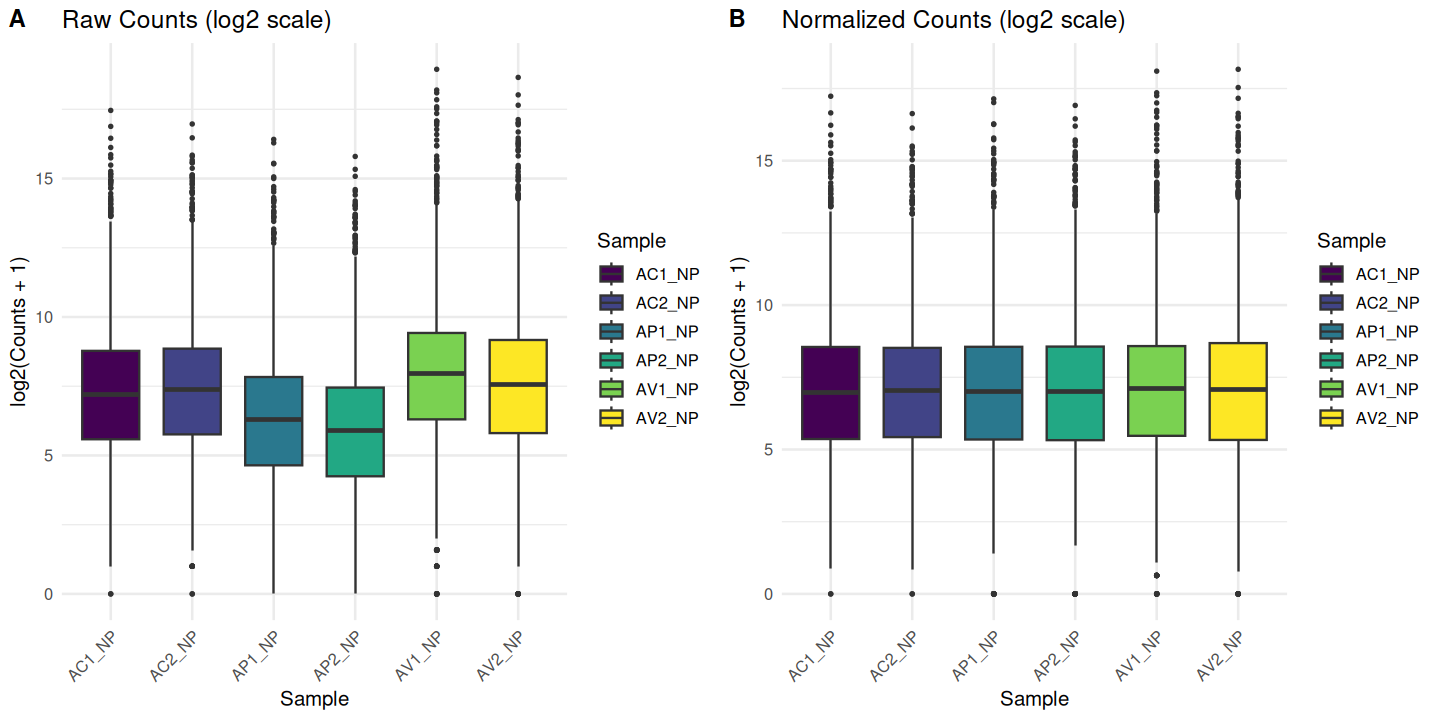

In [12]:
print("Boxplot of Raw vs log2 Normalized Counts")

# Prepare raw counts
raw_counts <- as.data.frame(counts(dds, normalized = FALSE))
raw_counts$Gene <- rownames(raw_counts)
raw_long <- pivot_longer(raw_counts, -Gene, names_to = "Sample", values_to = "Count")
raw_long$log2_count <- log2(raw_long$Count + 1)

# Prepare normalized counts
norm_counts <- as.data.frame(counts(dds, normalized = TRUE))
norm_counts$Gene <- rownames(norm_counts)
norm_long <- pivot_longer(norm_counts, -Gene, names_to = "Sample", values_to = "Count")
norm_long$log2_count <- log2(norm_long$Count + 1)

# Color palette
sample_list <- unique(c(raw_long$Sample, norm_long$Sample))
sample_colors <- setNames(viridis::viridis(length(sample_list), option = "D"), sample_list)

# Plot p1: Raw counts
p1 <- ggplot(raw_long, aes(x = Sample, y = log2_count, fill = Sample)) +
  geom_boxplot(outlier.size = 0.5, width = 0.7) +
  scale_fill_manual(values = sample_colors, name = "Sample") +
  theme_minimal(base_size = 12) +
  labs(title = "Raw Counts (log2 scale)",
       y = "log2(Counts + 1)", x = "Sample") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Plot p2: Normalized counts
p2 <- ggplot(norm_long, aes(x = Sample, y = log2_count, fill = Sample)) +
  geom_boxplot(outlier.size = 0.5, width = 0.7) +
  scale_fill_manual(values = sample_colors, name = "Sample") +
  theme_minimal(base_size = 12) +
  labs(title = "Normalized Counts (log2 scale)",
       y = "log2(Counts + 1)", x = "Sample") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Combine side-by-side
options(repr.plot.width = 12, repr.plot.height = 6)

# Combine side-by-side
plot_grid(p1, p2, labels = c("A", "B"), ncol = 2, align = 'h')

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


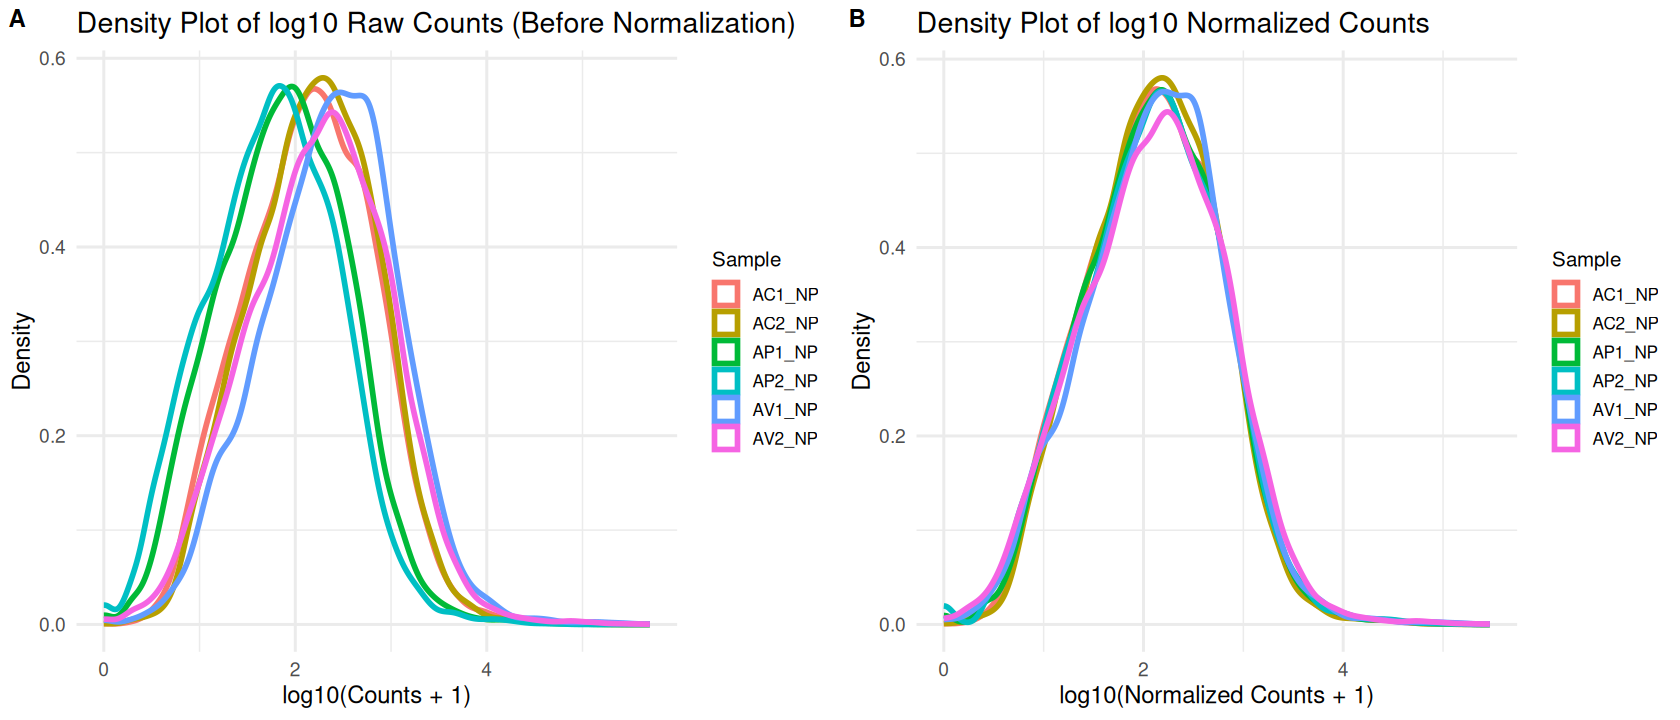

In [13]:
# Extract raw counts and log-transform
raw_counts <- counts(dds, normalized = FALSE)
raw_log_counts <- log10(raw_counts + 1)

# Convert to long format for ggplot2
log1_df <- as.data.frame(raw_log_counts)
log1_df$Gene <- rownames(log1_df)
log1_long <- pivot_longer(log1_df, -Gene, names_to = "Sample", values_to = "log10_count")

# Extract normalized counts and log-transform
norm_counts <- counts(dds, normalized = TRUE)
norm_log_counts <- log10(norm_counts + 1)

# Convert to long format for ggplot2
log2_df <- as.data.frame(norm_log_counts)
log2_df$Gene <- rownames(log2_df)
log2_long <- pivot_longer(log2_df, -Gene, names_to = "Sample", values_to = "log10_count")

# Plot with ggplot2
p1 = ggplot(log1_long, aes(x = log10_count, color = Sample)) +
  geom_density(size = 1.2, alpha = 0.8) +
  theme_minimal(base_size = 14) +
  labs(
    title = "Density Plot of log10 Raw Counts (Before Normalization)",
    x = "log10(Counts + 1)",
    y = "Density"
  ) +
  theme(
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 10),
    legend.position = "right"
  )
# Plot with ggplot2
p2 = ggplot(log2_long, aes(x = log10_count, color = Sample)) +
  geom_density(size = 1.2, alpha = 0.8) +
  theme_minimal(base_size = 14) +
  labs(
    title = "Density Plot of log10 Normalized Counts",
    x = "log10(Normalized Counts + 1)",
    y = "Density"
  ) +
  theme(
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 10),
    legend.position = "right"
  )

# Combine side-by-side
options(repr.plot.width = 14, repr.plot.height = 6)

# Combine side-by-side
plot_grid(p1, p2, labels = c("A", "B"), ncol = 2, align = 'h')

In [14]:
print("printing the results")
resultsNames(dds)

as.data.frame(colData(dds))

head(rowData(dds), 3)
# or
# head(mcols(dds), 3)

[1] "printing the results"


[1] "Intercept"          "condition_AC_vs_AV" "condition_AP_vs_AV"

condition sizeFactor
AC1_NP AC        1.1702662 
AC2_NP AC        1.2646608 
AP1_NP AP        0.6044499 
AP2_NP AP        0.4609352 
AV1_NP AV        1.7948441 
AV2_NP AV        1.4007098

DataFrame with 3 rows and 26 columns
                 baseMean    baseVar   allZero dispGeneEst dispGeneIter
                <numeric>  <numeric> <logical>   <numeric>    <numeric>
ENSG00000310528   11.6073    11.8314     FALSE  0.00000001            7
ENSG00000310527   30.2152    14.1582     FALSE  0.00000001           10
ENSG00000225880  415.7271 80149.0210     FALSE  0.08126658            7
                  dispFit dispersion  dispIter dispOutlier   dispMAP Intercept
                <numeric>  <numeric> <integer>   <logical> <numeric> <numeric>
ENSG00000310528 0.3362446  0.2690714         9       FALSE 0.2690714   3.33281
ENSG00000310527 0.1500427  0.1126660         7       FALSE 0.1126660   4.85407
ENSG00000225880 0.0423348  0.0519857        10       FALSE 0.0519857   9.53041
                condition_AC_vs_AV condition_AP_vs_AV SE_Intercept
                         <numeric>          <numeric>    <numeric>
ENSG00000310528           0.370838          0.1972451     0.587767
ENSG000

In [15]:
message("What is Cook’s distance?\n\n",
        "Cook's distance comes from regression analysis. It tells you how much a single data point (sample) influences the estimated coefficients (i.e., the log2 fold changes) for a gene.\n\n",
        "In the context of DESeq2, Cook's distance is computed per gene per sample.\n",
        "It quantifies how much the removal of that sample would change the fitted model for the gene.\n")

What is Cook’s distance?

Cook's distance comes from regression analysis. It tells you how much a single data point (sample) influences the estimated coefficients (i.e., the log2 fold changes) for a gene.

In the context of DESeq2, Cook's distance is computed per gene per sample.
It quantifies how much the removal of that sample would change the fitted model for the gene.




In [16]:
print("No shrinkage")

# Get results for different comparisons
res_AP_vs_AC <- results(dds, contrast = c("condition", "AP", "AC"))
res_AP_vs_AV <- results(dds, contrast = c("condition", "AP", "AV"))
res_AC_vs_AV <- results(dds, contrast = c("condition", "AC", "AV"))

# summary(res_AP_vs_AC)
# summary(res_AC_vs_AV)
# summary(res_AP_vs_AV)

# Save results
write.csv(as.data.frame(res_AP_vs_AC), file = "A549.peaks.nonIP.samples.DESeq2_AP_vs_AC_results.csv")
write.csv(as.data.frame(res_AP_vs_AV), file = "A549.peaks.nonIP.samples.DESeq2_AP_vs_AV_results.csv")
write.csv(as.data.frame(res_AC_vs_AV), file = "A549.peaks.nonIP.samples.DESeq2_AC_vs_AV_results.csv")

###########################################################
###########################################################

print("number of differentially bound transcripts : AP vs AC : pvalue < 0.05 and padj < 0.1")
dim(subset(res_AP_vs_AC, pvalue < 0.05))[1]
dim(subset(res_AP_vs_AC, padj < 0.1))[1]

print("number of differentially bound transcripts : AP vs AV : pvalue < 0.05 and padj < 0.1")
dim(subset(res_AP_vs_AV, pvalue < 0.05))[1]
dim(subset(res_AP_vs_AV, padj < 0.1))[1]

print("number of differentially bound transcripts : AC vs AV : pvalue < 0.05 and padj < 0.1")
dim(subset(res_AC_vs_AV, pvalue < 0.05))[1]
dim(subset(res_AC_vs_AV, padj < 0.1))[1]

###########################################################
###########################################################

[1] "No shrinkage"
[1] "number of differentially bound transcripts : AP vs AC : pvalue < 0.05 and padj < 0.1"


[1] 281

[1] 11

[1] "number of differentially bound transcripts : AP vs AV : pvalue < 0.05 and padj < 0.1"


[1] 4700

[1] 4649

[1] "number of differentially bound transcripts : AC vs AV : pvalue < 0.05 and padj < 0.1"


[1] 4786

[1] 4751

In [17]:
# type = c("apeglm", "ashr", "normal")

In [18]:
print("Data shrinkage : normal lfcShrink")

[1] "Data shrinkage : normal lfcShrink"


In [19]:
# Get results for different comparisons

resLFCnormal_AP_vs_AV <- lfcShrink(dds, contrast = c("condition", "AP", "AV"), type="normal")
resLFCnormal_AC_vs_AV <- lfcShrink(dds, contrast = c("condition", "AC", "AV"), type="normal")
resLFCnormal_AP_vs_AC <- lfcShrink(dds, contrast = c("condition", "AP", "AC"), type="normal")

# summary(resLFCnormal_AP_vs_AC)
# summary(resLFCnormal_AC_vs_AV)
# summary(resLFCnormal_AP_vs_AV)

# Save results
write.csv(as.data.frame(resLFCnormal_AP_vs_AC), file = "A549.peaks.nonIP.samples.DESeq2_AP_vs_AC_results.resLFCnormal.csv")
write.csv(as.data.frame(resLFCnormal_AP_vs_AV), file = "A549.peaks.nonIP.samples.DESeq2_AP_vs_AV_results.resLFCnormal.csv")
write.csv(as.data.frame(resLFCnormal_AC_vs_AV), file = "A549.peaks.nonIP.samples.DESeq2_AC_vs_AV_results.resLFCnormal.csv")

###########################################################
###########################################################

print("number of differentially bound and expressed transcripts : resLFCnormal: AP vs AC : pvalue < 0.05 and padj < 0.1")
dim(subset(resLFCnormal_AP_vs_AC, pvalue < 0.05))
dim(subset(resLFCnormal_AP_vs_AC, padj < 0.1))

print("number of differentially bound and expressed transcripts : resLFCnormal : AP vs AV : pvalue < 0.05 and padj < 0.1")
dim(subset(resLFCnormal_AP_vs_AV, pvalue < 0.05))
dim(subset(resLFCnormal_AP_vs_AV, padj < 0.1))

print("number of differentially bound and expressed transcripts : resLFCashr : AC vs AV : pvalue < 0.05 and padj < 0.1")
dim(subset(resLFCnormal_AC_vs_AV, pvalue < 0.05))
dim(subset(resLFCnormal_AC_vs_AV, padj < 0.1))

###########################################################
###########################################################

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895



[1] "number of differentially bound and expressed transcripts : resLFCnormal: AP vs AC : pvalue < 0.05 and padj < 0.1"


[1] 281   6

[1] 11  6

[1] "number of differentially bound and expressed transcripts : resLFCnormal : AP vs AV : pvalue < 0.05 and padj < 0.1"


[1] 4700    6

[1] 4649    6

[1] "number of differentially bound and expressed transcripts : resLFCashr : AC vs AV : pvalue < 0.05 and padj < 0.1"


[1] 4786    6

[1] 4751    6

In [20]:
print("Data shrinkage : ashr lfcShrink")

[1] "Data shrinkage : ashr lfcShrink"


In [21]:
# If you must use contrast, you should use type="normal" or type="ashr" instead of apeglm, 
# because apeglm only works with coef.  
# Apeglm is the recommended method for log-fold change shrinkage.

# Get results for different comparisons
# resLFCapeglm_AP_vs_AV <- lfcShrink(dds, coef = "condition_AP_vs_AV", type="apeglm")
# resLFCapeglm_AC_vs_AV <- lfcShrink(dds, coef = "condition_AC_vs_AV", type="apeglm")

resLFCashr_AP_vs_AV <- lfcShrink(dds, contrast = c("condition", "AP", "AV"), type="ashr")
resLFCashr_AC_vs_AV <- lfcShrink(dds, contrast = c("condition", "AC", "AV"), type="ashr")
resLFCashr_AP_vs_AC <- lfcShrink(dds, contrast = c("condition", "AP", "AC"), type="ashr")

# summary(resLFCashr_AP_vs_AC)
# summary(resLFCashr_AC_vs_AV)
# summary(resLFCashr_AP_vs_AV)

# Save results
write.csv(as.data.frame(resLFCashr_AP_vs_AC), file = "A549.peaks.nonIP.samples.DESeq2_AP_vs_AC_results.resLFCashr.csv")
write.csv(as.data.frame(resLFCashr_AP_vs_AV), file = "A549.peaks.nonIP.samples.DESeq2_AP_vs_AV_results.resLFCashr.csv")
write.csv(as.data.frame(resLFCashr_AC_vs_AV), file = "A549.peaks.nonIP.samples.DESeq2_AC_vs_AV_results.resLFCashr.csv")

###########################################################
###########################################################

print("number of differentially bound and expressed transcripts : resLFCashr : AP vs AC : pvalue < 0.05 and padj < 1")
dim(subset(resLFCashr_AP_vs_AC, pvalue < 0.05))[1]
dim(subset(resLFCashr_AP_vs_AC, padj < 0.1))[1]

print("number of differentially bound and expressed transcripts : resLFCashr : AP vs AV : pvalue < 0.05 ")
dim(subset(resLFCashr_AP_vs_AV, pvalue < 0.05))[1]
dim(subset(resLFCashr_AP_vs_AV, padj < 0.1))[1]

print("number of differentially bound and expressed transcripts : resLFCashr : AC vs AV : pvalue < 0.05")
dim(subset(resLFCashr_AC_vs_AV, pvalue < 0.05))[1]
dim(subset(resLFCashr_AC_vs_AV, padj < 0.1))[1]

###########################################################
###########################################################

using 'ashr' for LFC shrinkage. If used in published research, please cite:
    Stephens, M. (2016) False discovery rates: a new deal. Biostatistics, 18:2.
    https://doi.org/10.1093/biostatistics/kxw041

using 'ashr' for LFC shrinkage. If used in published research, please cite:
    Stephens, M. (2016) False discovery rates: a new deal. Biostatistics, 18:2.
    https://doi.org/10.1093/biostatistics/kxw041

using 'ashr' for LFC shrinkage. If used in published research, please cite:
    Stephens, M. (2016) False discovery rates: a new deal. Biostatistics, 18:2.
    https://doi.org/10.1093/biostatistics/kxw041



[1] "number of differentially bound and expressed transcripts : resLFCashr : AP vs AC : pvalue < 0.05 and padj < 1"


[1] 281

[1] 11

[1] "number of differentially bound and expressed transcripts : resLFCashr : AP vs AV : pvalue < 0.05 "


[1] 4700

[1] 4649

[1] "number of differentially bound and expressed transcripts : resLFCashr : AC vs AV : pvalue < 0.05"


[1] 4786

[1] 4751

In [22]:
# If you must use contrast, you should use type="normal" or type="ashr" instead of apeglm, 
# because apeglm only works with coef.  
# Apeglm is the recommended method for log-fold change shrinkage.

# Get results for different comparisons
# resLFCapeglm_AP_vs_AV <- lfcShrink(dds, coef = "condition_AP_vs_AV", type="apeglm")
# resLFCapeglm_AC_vs_AV <- lfcShrink(dds, coef = "condition_AC_vs_AV", type="apeglm")

resLFCashr_AP_vs_AV <- lfcShrink(dds, contrast = c("condition", "AP", "AV"), type="ashr")
resLFCashr_AC_vs_AV <- lfcShrink(dds, contrast = c("condition", "AC", "AV"), type="ashr")
resLFCashr_AP_vs_AC <- lfcShrink(dds, contrast = c("condition", "AP", "AC"), type="ashr")

# summary(resLFCashr_AP_vs_AC)
# summary(resLFCashr_AC_vs_AV)
# summary(resLFCashr_AP_vs_AV)

# Save results
write.csv(as.data.frame(resLFCashr_AP_vs_AC), file = "A549.peaks.nonIP.samples.DESeq2_AP_vs_AC_results.resLFCashr.csv")
write.csv(as.data.frame(resLFCashr_AP_vs_AV), file = "A549.peaks.nonIP.samples.DESeq2_AP_vs_AV_results.resLFCashr.csv")
write.csv(as.data.frame(resLFCashr_AC_vs_AV), file = "A549.peaks.nonIP.samples.DESeq2_AC_vs_AV_results.resLFCashr.csv")

###########################################################
###########################################################

print("number of differentially bound and expressed transcripts : resLFCashr : AP vs AC : pvalue < 0.05 and padj < 1")
dim(subset(resLFCashr_AP_vs_AC, pvalue < 0.05))[1]
dim(subset(resLFCashr_AP_vs_AC, padj < 0.1))[1]

print("number of differentially bound and expressed transcripts : resLFCashr : AP vs AV : pvalue < 0.05 and padj < 1")
dim(subset(resLFCashr_AP_vs_AV, pvalue < 0.05))[1]
dim(subset(resLFCashr_AP_vs_AV, padj < 0.1))[1]

print("number of differentially bound and expressed transcripts : resLFCashr : AC vs AV : pvalue < 0.05 and padj < 1")
dim(subset(resLFCashr_AC_vs_AV, pvalue < 0.05))[1]
dim(subset(resLFCashr_AC_vs_AV, padj < 0.1))[1]

###########################################################
###########################################################

using 'ashr' for LFC shrinkage. If used in published research, please cite:
    Stephens, M. (2016) False discovery rates: a new deal. Biostatistics, 18:2.
    https://doi.org/10.1093/biostatistics/kxw041

using 'ashr' for LFC shrinkage. If used in published research, please cite:
    Stephens, M. (2016) False discovery rates: a new deal. Biostatistics, 18:2.
    https://doi.org/10.1093/biostatistics/kxw041

using 'ashr' for LFC shrinkage. If used in published research, please cite:
    Stephens, M. (2016) False discovery rates: a new deal. Biostatistics, 18:2.
    https://doi.org/10.1093/biostatistics/kxw041



[1] "number of differentially bound and expressed transcripts : resLFCashr : AP vs AC : pvalue < 0.05 and padj < 1"


[1] 281

[1] 11

[1] "number of differentially bound and expressed transcripts : resLFCashr : AP vs AV : pvalue < 0.05 and padj < 1"


[1] 4700

[1] 4649

[1] "number of differentially bound and expressed transcripts : resLFCashr : AC vs AV : pvalue < 0.05 and padj < 1"


[1] 4786

[1] 4751

[1] "Comparing the number of DE genes for the comparison : AP vs AC for a pvalue < 0.05"
[1] "Comparing the number of DE genes for the comparison : AP vs AC for a pvalue < 0.05"


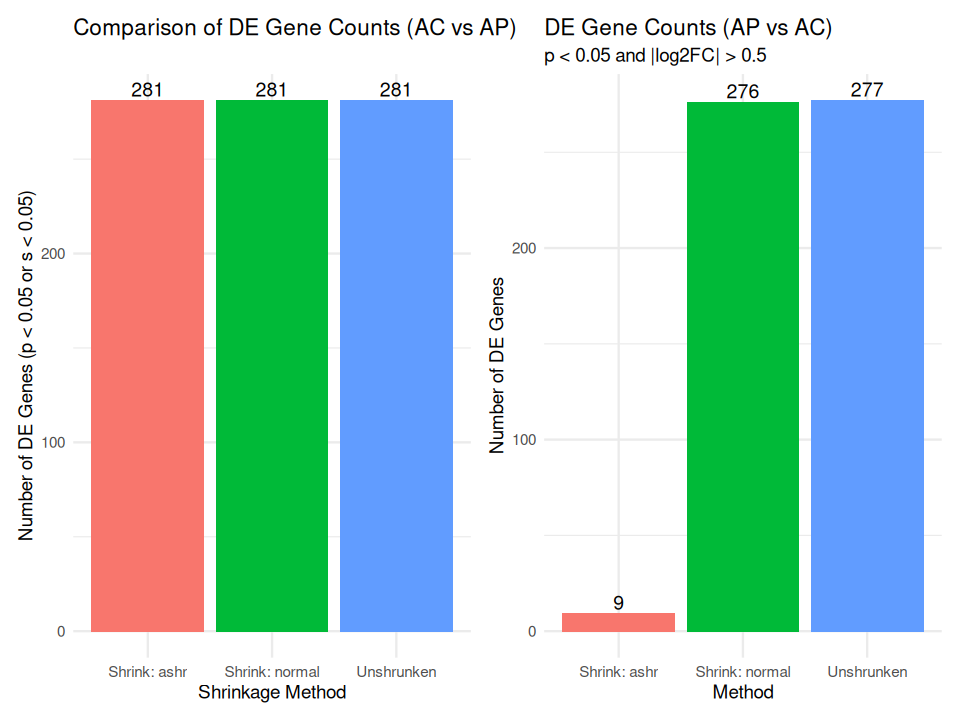

In [23]:
print("Comparing the number of DE genes for the comparison : AP vs AC for a pvalue < 0.05")

# Define thresholds
pval_cutoff <- 0.05
lfc_cutoff <- 0.5

# The information about DE peaks was stored in :
# res_AP_vs_AC 
# res_AP_vs_AV 
# res_AC_vs_AV 

# resLFCnormal_AP_vs_AV
# resLFCnormal_AC_vs_AV 
# resLFCnormal_AP_vs_AC 

# resLFCashr_AP_vs_AV 
# resLFCashr_AC_vs_AV 
# resLFCashr_AP_vs_AC 

# Count DEGs
n_DE_unshrunken <- sum(res_AP_vs_AC$pvalue < 0.05, na.rm = TRUE)
n_DE_shrink_normal <- sum(resLFCnormal_AP_vs_AC$pvalue < 0.05, na.rm = TRUE)  # Same p-values as unshrunken
n_DE_ashr <- sum( resLFCashr_AP_vs_AC$pvalue < 0.05, na.rm = TRUE)            # Same p-values as unshrunken

# Build a data frame
compare_df1 <- data.frame(
  Method = c("Unshrunken", "Shrink: normal", "Shrink: ashr"),
  DE_Genes = c(n_DE_unshrunken, n_DE_shrink_normal, n_DE_ashr)
)

# Plot it
p1 = ggplot(compare_df1, aes(x = Method, y = DE_Genes, fill = Method)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  labs(
    title = "Comparison of DE Gene Counts (AC vs AP)",
    y = "Number of DE Genes (p < 0.05 or s < 0.05)",
    x = "Shrinkage Method"
  ) +
  theme(legend.position = "none") +
  geom_text(aes(label = DE_Genes), vjust = -0.3, size = 4)

print("Comparing the number of DE genes for the comparison : AP vs AC for a pvalue < 0.05")

# Shrinkage Methods: The lfcShrink() function in DESeq2 is used to obtain more accurate estimates of log2 fold changes, 
# especially for genes with low counts or high variability.
# Threshold Selection: The choice of a log2FC threshold (e.g., 0.3) is somewhat arbitrary and should be based on the biological context 
# and the desired stringency of the analysis.
# Interpretation: Comparing the number of DE genes across different shrinkage methods can provide insights into the robustness of your findings. 
# It's common to observe variations in the number of DE genes identified, depending on the method used.

# Raw (non-shrunk)
n_raw <- sum(res_AP_vs_AC$pvalue < pval_cutoff & abs(res_AP_vs_AC$log2FoldChange) > lfc_cutoff, na.rm = TRUE)
# Normal shrink
n_normal <- sum(res_AP_vs_AC$pvalue < pval_cutoff & abs(resLFCnormal_AP_vs_AC$log2FoldChange) > lfc_cutoff, na.rm = TRUE)
# Ashr shrink (using s-value instead of p-value)
n_ashr <- sum(resLFCashr_AP_vs_AC$pvalue < pval_cutoff & abs(resLFCashr_AP_vs_AC$log2FoldChange) > lfc_cutoff, na.rm = TRUE)

# Combine into a data frame
compare_df2 <- data.frame(
  Method = c("Unshrunken", "Shrink: normal", "Shrink: ashr"),
  DE_Genes = c(n_raw, n_normal, n_ashr)
)

p2 = ggplot(compare_df2, aes(x = Method, y = DE_Genes, fill = Method)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  labs(
    title = "DE Gene Counts (AP vs AC)",
    subtitle = "p < 0.05 and |log2FC| > 0.5",
    y = "Number of DE Genes",
    x = "Method"
  ) +
  geom_text(aes(label = DE_Genes), vjust = -0.3, size = 4) +
  theme(legend.position = "none")


# Print the plot in Jupyter
options(repr.plot.width = 8, repr.plot.height = 6)
p1 + p2

In [24]:
print("MA plots:")

# Define thresholds
pval_cutoff <- 0.05
lfc_cutoff <- 0.5

[1] "MA plots:"


In [25]:
make_MA_plot <- function(res_df, title = "MA Plot", lfc_cutoff = 0.3, pval_cutoff = 0.1, ylim = c(-2, 2)) {
  
  res_df <- as.data.frame(res_df)
  
  # Replace NA p-values with the threshold so they are not considered significant
  res_df$pvalue[is.na(res_df$pvalue)] <- 1
  
  # Label significance based on thresholds
  res_df$sig <- ifelse(res_df$pvalue < pval_cutoff & abs(res_df$log2FoldChange) > lfc_cutoff,
                       "Significant", "Not Significant")

  # Generate the MA plot
  ggplot(res_df, aes(x = baseMean, y = log2FoldChange, color = sig)) +
    geom_point(alpha = 0.6, size = 1) +
    scale_x_log10() +
    scale_color_manual(values = c("Significant" = "#D7263D", "Not Significant" = "gray70")) +
    geom_hline(yintercept = c(-lfc_cutoff, lfc_cutoff), linetype = "dashed", color = "black") +
    coord_cartesian(ylim = ylim) +
    theme_minimal(base_size = 14) +
    labs(
      title = title,
      x = "Mean Expression (log10 scale)",
      y = "log2 Fold Change",
      color = "Significance"
    ) +
    theme(
      legend.position = "right",
      panel.grid.minor = element_blank()
    )
}


[1] "MA plots:"
[1] "AP vs AC"


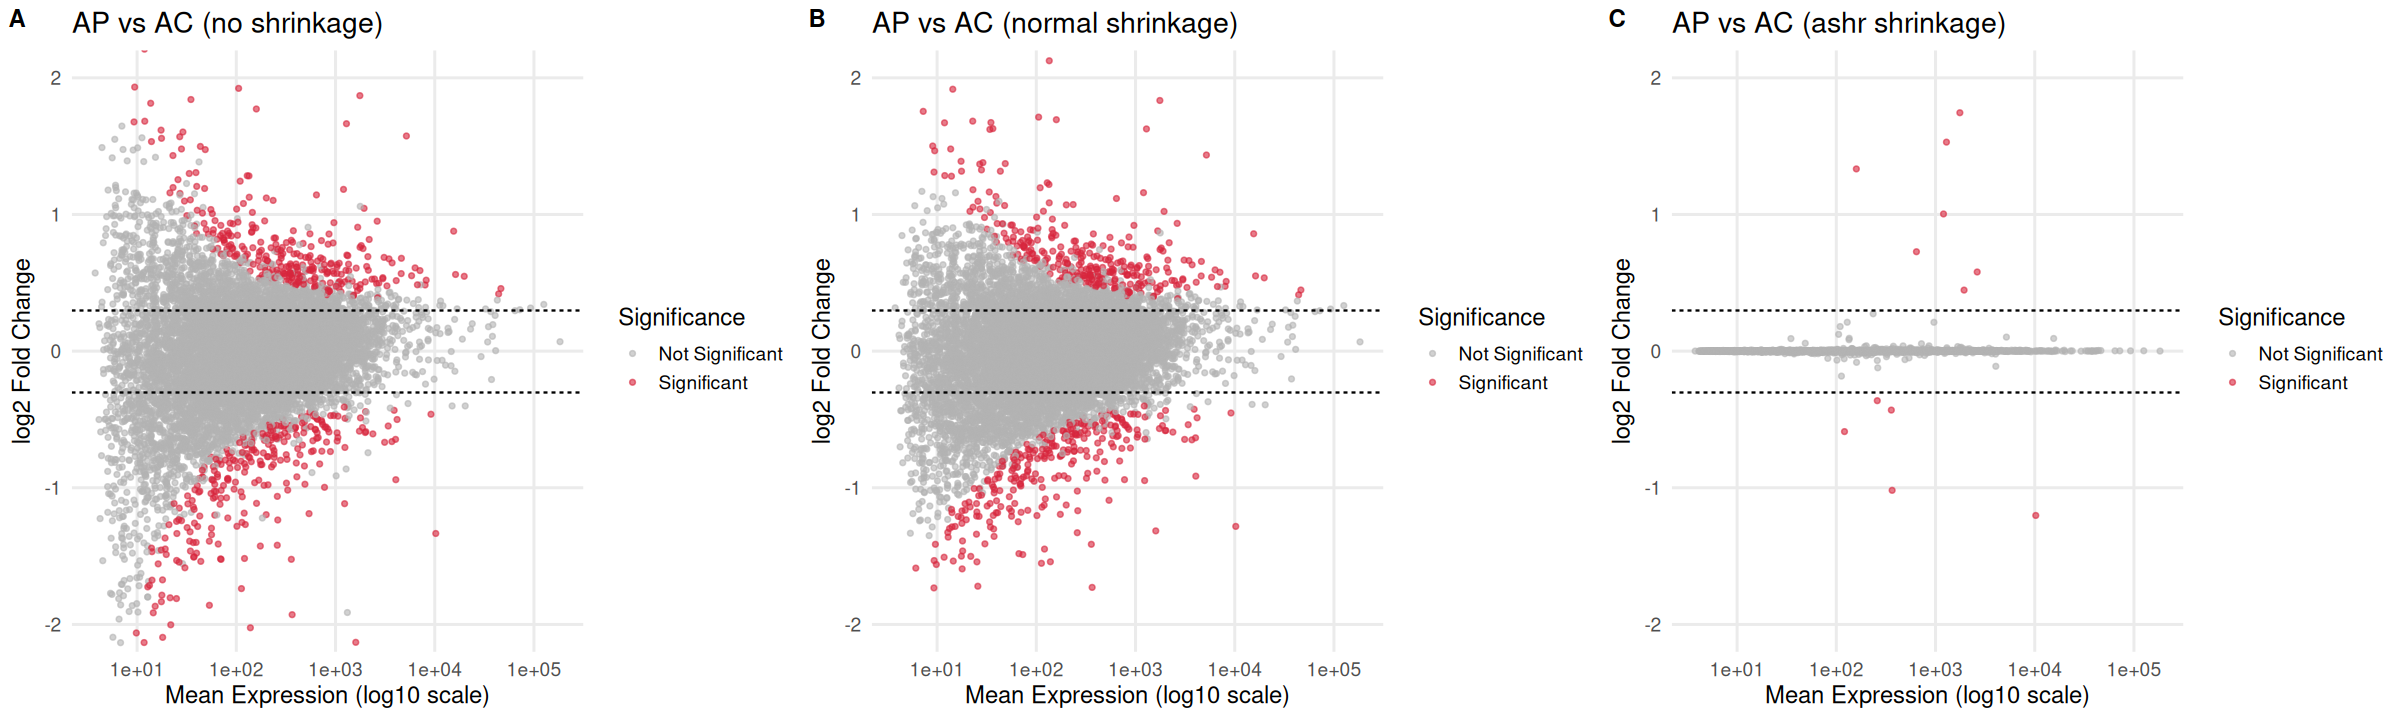

In [26]:
print("MA plots:")
print("AP vs AC")

# Create the plots
p1 <- make_MA_plot(res_AP_vs_AC, title = "AP vs AC (no shrinkage)", lfc_cutoff = 0.3, pval_cutoff = 0.1)
p2 <- make_MA_plot(resLFCnormal_AP_vs_AC, title = "AP vs AC (normal shrinkage)", lfc_cutoff = 0.3, pval_cutoff = 0.1)
p3 <- make_MA_plot(resLFCashr_AP_vs_AC, title = "AP vs AC (ashr shrinkage)", lfc_cutoff = 0.3, pval_cutoff = 0.1)

# Combine side-by-side
options(repr.plot.width = 20, repr.plot.height = 6)

# Combine side-by-side
plot_grid(p1, p2, p3, labels = c("A", "B", "C"), ncol = 3, align = 'h')

[1] "MA plots:"
[1] "AC vs AV"


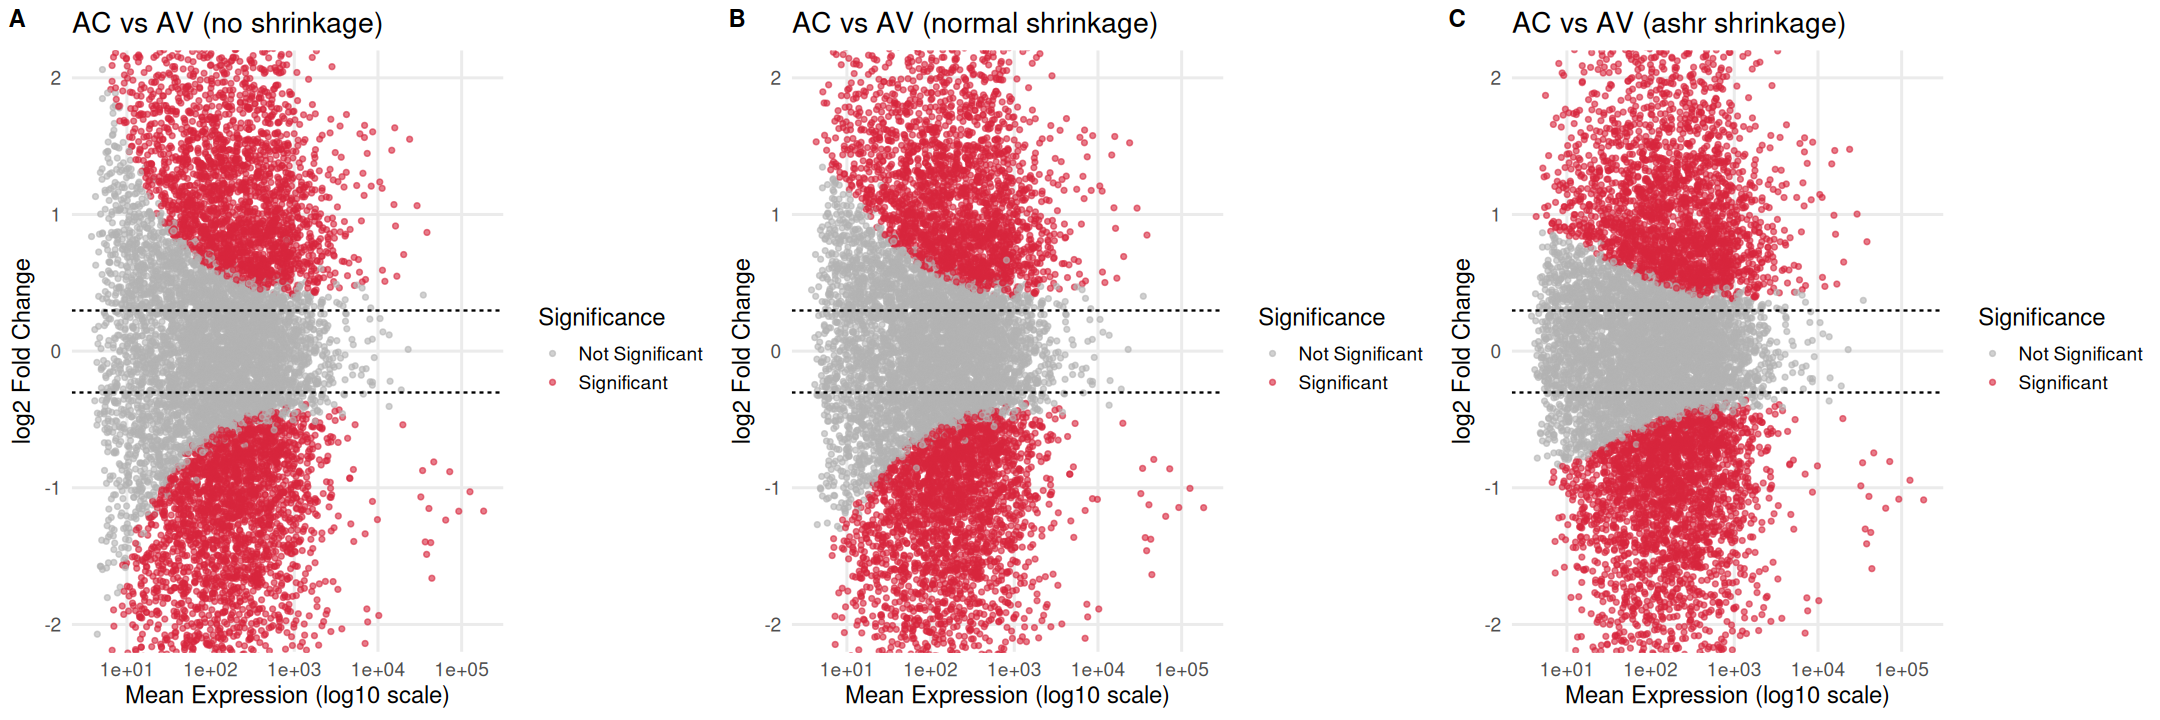

In [27]:
print("MA plots:")
print("AC vs AV")

# Create the plots
p1 <- make_MA_plot(res_AC_vs_AV, title = "AC vs AV (no shrinkage)", lfc_cutoff = 0.3, pval_cutoff = 0.1)
p2 <- make_MA_plot(resLFCnormal_AC_vs_AV, title = "AC vs AV (normal shrinkage)", lfc_cutoff = 0.3, pval_cutoff = 0.1)
p3 <- make_MA_plot(resLFCashr_AC_vs_AV, title = "AC vs AV (ashr shrinkage)", lfc_cutoff = 0.3, pval_cutoff = 0.1)

# Combine side-by-side
options(repr.plot.width = 18, repr.plot.height = 6)

# Combine side-by-side
plot_grid(p1, p2, p3, labels = c("A", "B", "C"), ncol = 3, align = 'h')

[1] "MA plots:"
[1] "AP vs AV"


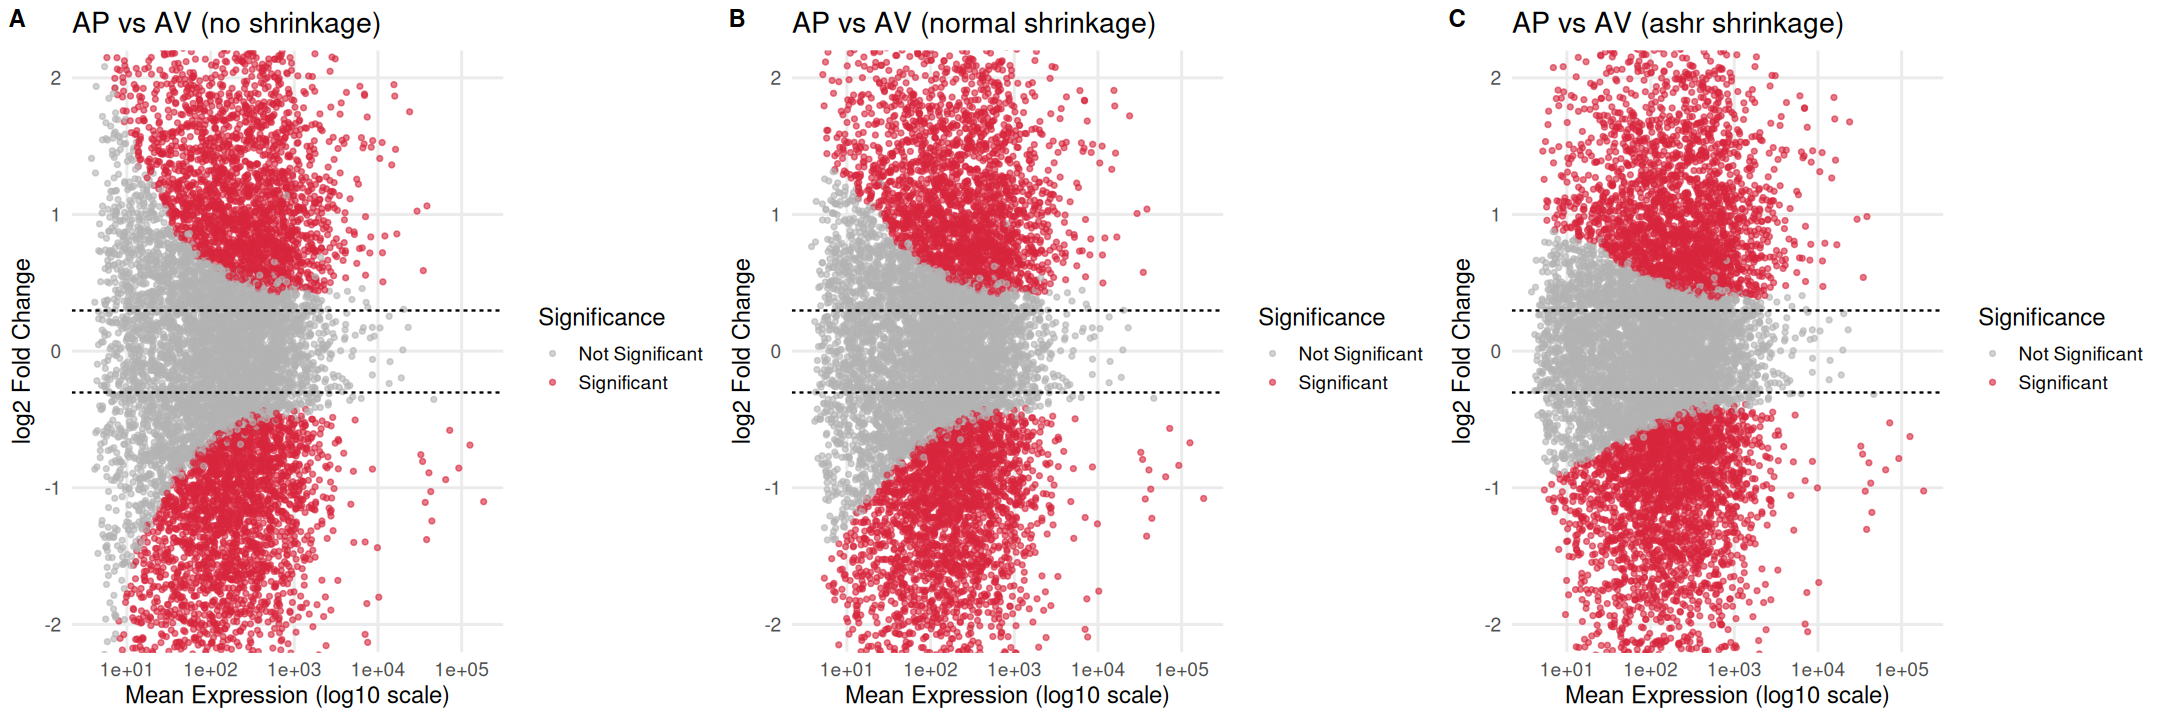

In [28]:
print("MA plots:")
print("AP vs AV")

# Create the plots
p1 <- make_MA_plot(res_AP_vs_AV, title = "AP vs AV (no shrinkage)", lfc_cutoff = 0.3, pval_cutoff = 0.1)
p2 <- make_MA_plot(resLFCnormal_AP_vs_AV, title = "AP vs AV (normal shrinkage)", lfc_cutoff = 0.3, pval_cutoff = 0.1)
p3 <- make_MA_plot(resLFCashr_AP_vs_AV, title = "AP vs AV (ashr shrinkage)", lfc_cutoff = 0.3, pval_cutoff = 0.1)

# Combine side-by-side
options(repr.plot.width = 18, repr.plot.height = 6)

# Combine side-by-side
plot_grid(p1, p2, p3, labels = c("A", "B", "C"), ncol = 3, align = 'h')

[1] "plotting dispersion"


function (q) 
coefs[1] + coefs[2]/q
<bytecode: 0x5fd3d2b76a28>
<environment: 0x5fd3d2b77080>
attr(,"coefficients")
asymptDisp  extraPois 
0.03389296 3.50948342 
attr(,"fitType")
[1] "parametric"
attr(,"varLogDispEsts")
[1] 0.7498353
attr(,"dispPriorVar")
[1] 0.25

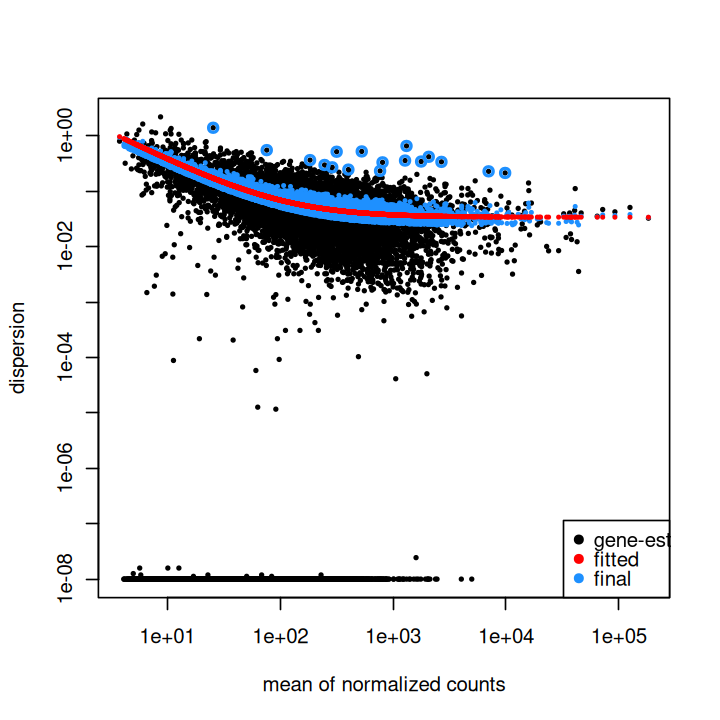

In [29]:
print("plotting dispersion")

# Combine side-by-side
options(repr.plot.width = 6, repr.plot.height = 6)

plotDispEsts(dds)
dispersionFunction(dds)

In [30]:
print("RLD and VST transformations")

# Effects of transformations on the variance
rld <- rlog(dds, blind = FALSE)  
vsd <- vst(dds, blind = FALSE) 
ntd <- normTransform(dds)
# meanSdPlot(assay(ntd))
# meanSdPlot(assay(rld))
# meanSdPlot(assay(vsd))

[1] "RLD and VST transformations"


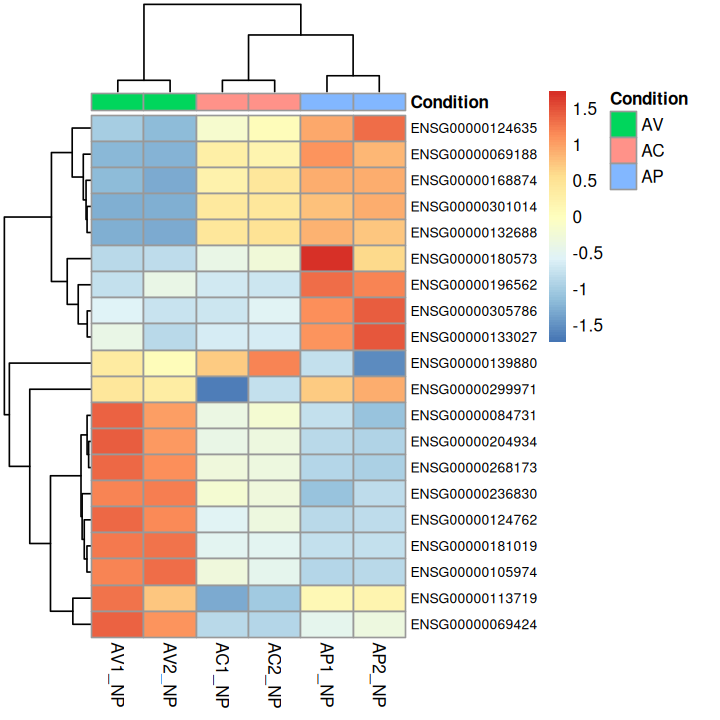

In [31]:
library("pheatmap")

# Select the top 20 differentially expressed genes based on adjusted p-value
top_genes <- rownames(res_AP_vs_AC)[order(res_AP_vs_AC$padj, na.last=NA)][1:20]  #

# Extract normalized transformed counts for the top genes
top_counts <- assay(vsd)[top_genes, ]

# Create annotation dataframe
df <- as.data.frame(colData(dds)["condition"])  # Ensure it is a proper dataframe
colnames(df) <- "Condition"  # Rename column for clarity

# Generate heatmap
options(repr.plot.width = 6, repr.plot.height = 6)
pheatmap(top_counts, 
         cluster_rows=TRUE,  # Cluster rows to group similar genes
         show_rownames=TRUE,  # Show gene names
         cluster_cols=TRUE,  # Cluster samples
         annotation_col=df,  # Add sample condition annotations
         scale="row",  # Normalize each gene's expression across samples
         fontsize_row=8)  # Adjust row text size for readability

In [32]:
print("PCA and MDS plots of rlog- and vst-transformed counts")

[1] "PCA and MDS plots of rlog- and vst-transformed counts"


using ntop=500 top features by variance

using ntop=500 top features by variance



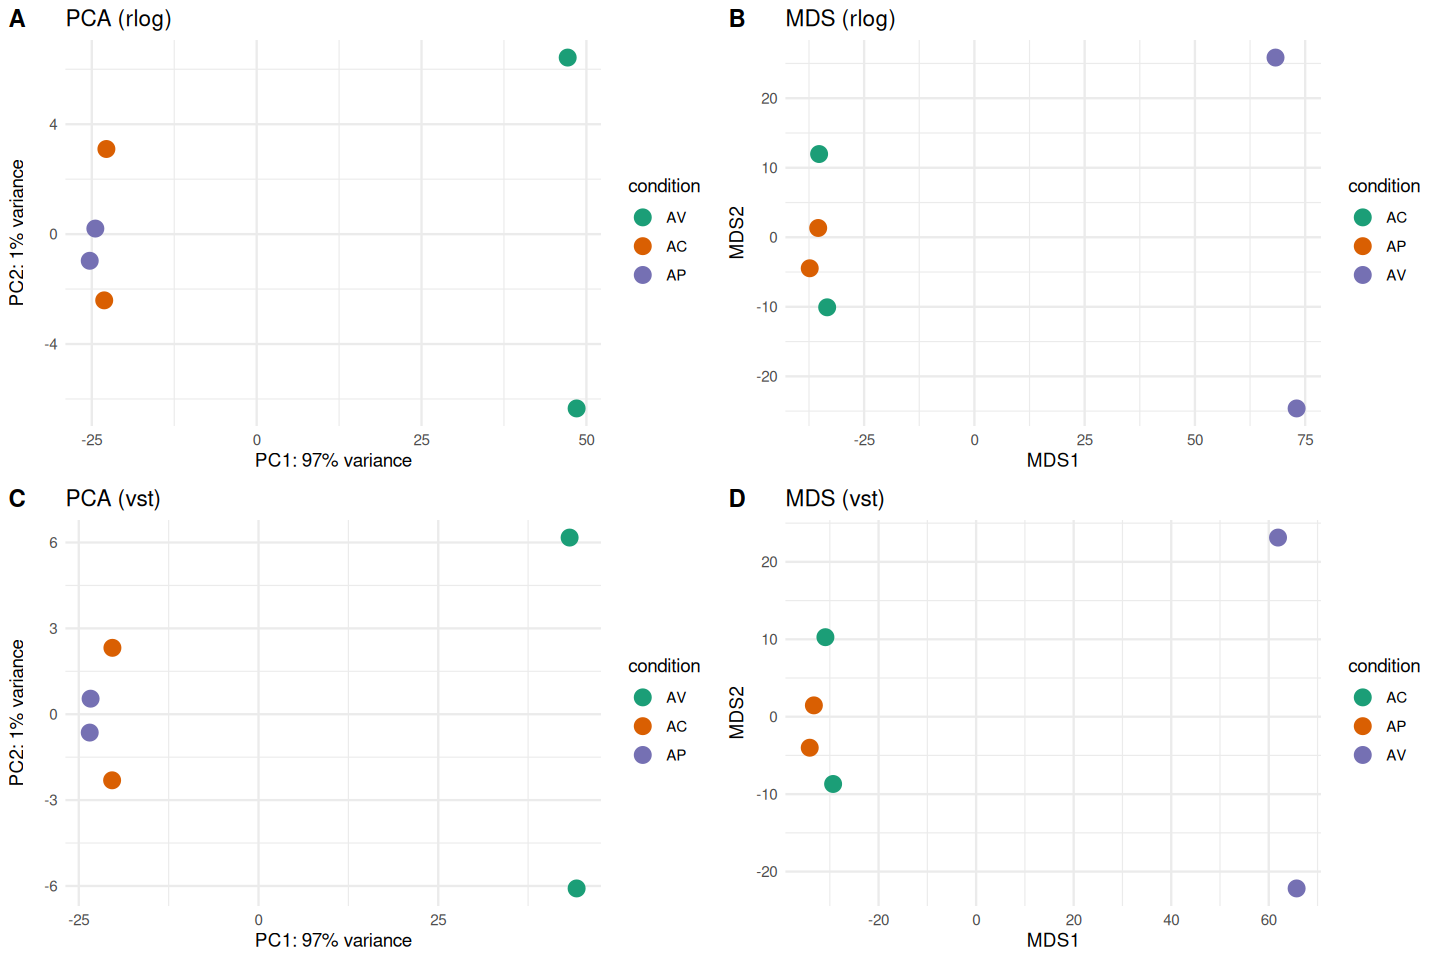

In [33]:

# 1. rlog transformation and PCA
rld <- rlog(dds, blind = FALSE)
pca_rld <- plotPCA(rld, intgroup = "condition", returnData = TRUE)
percentVar_rld <- round(100 * attr(pca_rld, "percentVar"))

pca_rld_plot <- ggplot(pca_rld, aes(PC1, PC2, color = condition)) +
  geom_point(size = 4) +
  scale_color_brewer(palette = "Dark2") +
  xlab(paste0("PC1: ", percentVar_rld[1], "% variance")) +
  ylab(paste0("PC2: ", percentVar_rld[2], "% variance")) +
  ggtitle("PCA (rlog)") +
  theme_minimal()

# 2. rlog MDS
dists_rld <- dist(t(assay(rld)))
mds_rld <- cmdscale(as.matrix(dists_rld))
mds_rld_df <- data.frame(MDS1 = mds_rld[,1], MDS2 = mds_rld[,2], condition = col_data$condition)

mds_rld_plot <- ggplot(mds_rld_df, aes(MDS1, MDS2, color = condition)) +
  geom_point(size = 4) +
  scale_color_brewer(palette = "Dark2") +
  ggtitle("MDS (rlog)") +
  theme_minimal()

# 3. vst transformation and PCA
vsd <- vst(dds, blind = FALSE)
pca_vsd <- plotPCA(vsd, intgroup = "condition", returnData = TRUE)
percentVar_vsd <- round(100 * attr(pca_vsd, "percentVar"))

pca_vsd_plot <- ggplot(pca_vsd, aes(PC1, PC2, color = condition)) +
  geom_point(size = 4) +
  scale_color_brewer(palette = "Dark2") +
  xlab(paste0("PC1: ", percentVar_vsd[1], "% variance")) +
  ylab(paste0("PC2: ", percentVar_vsd[2], "% variance")) +
  ggtitle("PCA (vst)") +
  theme_minimal()

# 4. vst MDS
dists_vsd <- dist(t(assay(vsd)))
mds_vsd <- cmdscale(as.matrix(dists_vsd))
mds_vsd_df <- data.frame(MDS1 = mds_vsd[,1], MDS2 = mds_vsd[,2], condition = col_data$condition)

mds_vsd_plot <- ggplot(mds_vsd_df, aes(MDS1, MDS2, color = condition)) +
  geom_point(size = 4) +
  scale_color_brewer(palette = "Dark2") +
  ggtitle("MDS (vst)") +
  theme_minimal()

# Combine side-by-side
options(repr.plot.width = 12, repr.plot.height = 8)
# Combine all plots in a 2x2 grid
plot_grid(
  pca_rld_plot, mds_rld_plot,
  pca_vsd_plot, mds_vsd_plot,
  labels = c("A", "B", "C", "D"),
  ncol = 2, align = "hv"
)


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


The following object is masked from 'package:Biobase':

    combine


The following object is masked from 'package:BiocGenerics':

    combine




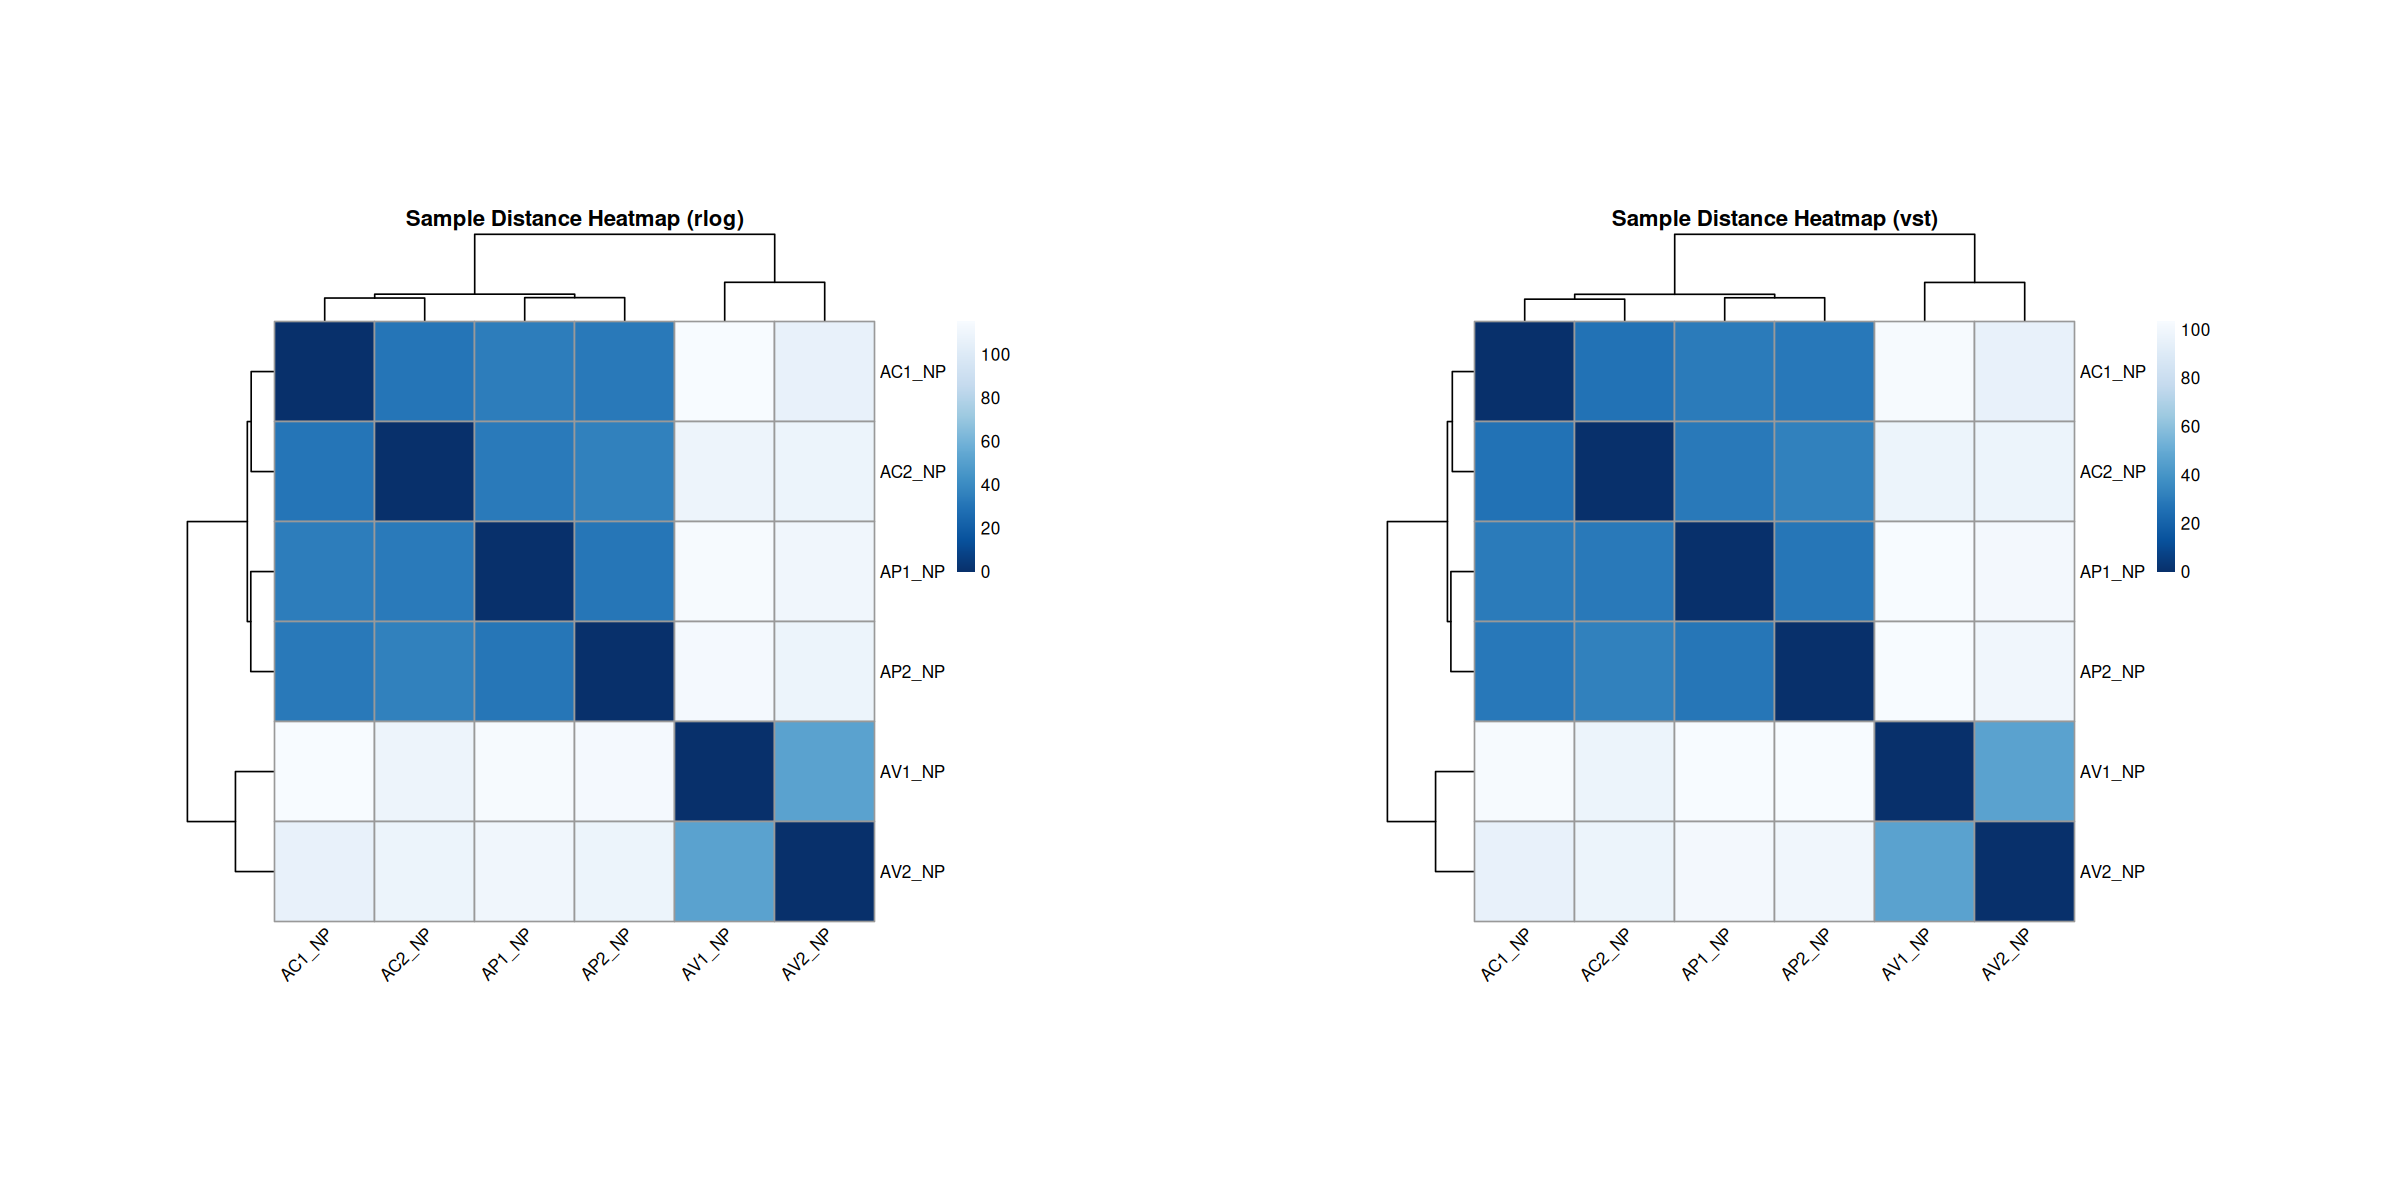

In [34]:
library(pheatmap)
library(RColorBrewer)
library(gridExtra)
library(grid)

# === RLOG Heatmap ===
rlog_matrix <- assay(rld)
sampleDists_rlog <- dist(t(rlog_matrix))
sampleDistMatrix_rlog <- as.matrix(sampleDists_rlog)
colors <- colorRampPalette(rev(brewer.pal(9, "Blues")))(255)

p1 <- pheatmap(sampleDistMatrix_rlog,
               clustering_distance_rows = sampleDists_rlog,
               clustering_distance_cols = sampleDists_rlog,
               col = colors,
               fontsize_row = 10,
               fontsize_col = 10,
               cellwidth = 60,
               cellheight = 60,
               angle_col = 45,
               main = "Sample Distance Heatmap (rlog)",
               silent = TRUE)

# === VST Heatmap ===
vsd_matrix <- assay(vsd)
sampleDists_vsd <- dist(t(vsd_matrix))
sampleDistMatrix_vsd <- as.matrix(sampleDists_vsd)

p2 <- pheatmap(sampleDistMatrix_vsd,
               clustering_distance_rows = sampleDists_vsd,
               clustering_distance_cols = sampleDists_vsd,
               col = colors,
               fontsize_row = 10,
               fontsize_col = 10,
               cellwidth = 60,
               cellheight = 60,
               angle_col = 45,
               main = "Sample Distance Heatmap (vst)",
               silent = TRUE)

# === Combine with spacing and ensure layout fits ===
grid.newpage()  # Ensures fresh drawing surface

# Combine side-by-side
options(repr.plot.width = 20, repr.plot.height = 10)

# === Convert pheatmap outputs to grobs ===
grob1 <- p1[[4]]
grob2 <- p2[[4]]

# === Combine with cowplot ===
cowplot::plot_grid(grob1, grob2, ncol = 2, rel_widths = c(1, 1))

In [35]:
print("Methods to use : GLM-PCA for PCA and PoissonDistance to calculate the sample distances")
# Another option for calculating sample distances is to use the Poisson Distance (Witten 2011), implemented in the PoiClaClu package.
# This measure of dissimilarity between counts also takes the inherent variance structure of counts into consideration when calculating
# the distances between samples. The PoissonDistance function takes the original count matrix (not normalized) with samples as rows
# instead of columns, so we need to transpose the counts in dds.

[1] "Methods to use : GLM-PCA for PCA and PoissonDistance to calculate the sample distances"


[1] "PCA by using GLMPCA library. RLOG and VSD transformations are more suitable than scale()."


Warning message in glmpca(assay(dds), L = 2):
"Reached maximum number of iterations (1000) without numerical convergence. Results may be unreliable."


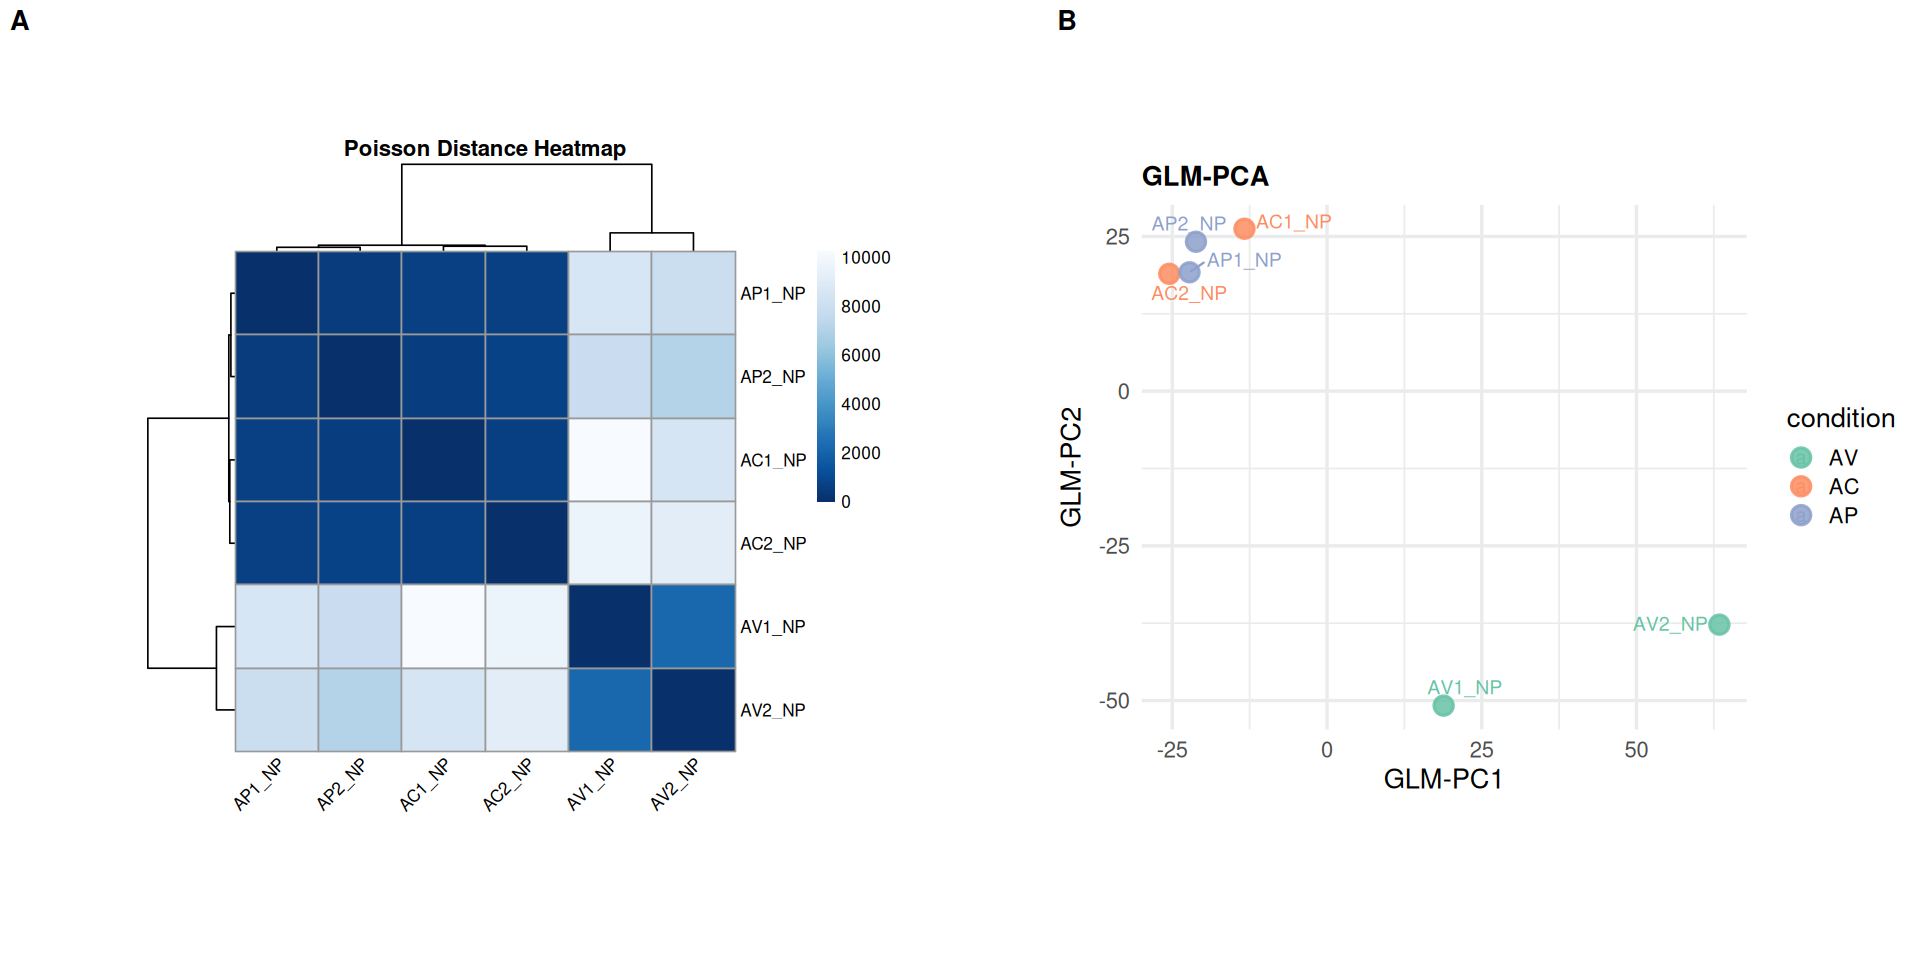

In [36]:
print("PCA by using GLMPCA library. RLOG and VSD transformations are more suitable than scale().")

# === GLM-PCA plot ===
gpca <- glmpca(assay(dds), L = 2)
gpca.dat <- gpca$factors
gpca.dat$sample <- colnames(dds)
gpca.dat$condition <- colData(dds)$condition

p_gpca <- ggplot(gpca.dat, aes(x = dim1, y = dim2, color = condition)) +
  geom_point(size = 4.5, alpha = 0.85, stroke = 1) +
  geom_text_repel(aes(label = sample), size = 4, box.padding = 0.4, max.overlaps = 8) +
  coord_fixed() +
  theme_minimal(base_size = 16) +
  labs(title = "GLM-PCA", x = "GLM-PC1", y = "GLM-PC2") +
  scale_color_brewer(palette = "Set2") +
  theme(
    legend.position = "right",
    plot.title = element_text(face = "bold", size = 16)
  )

# === Poisson distance heatmap ===
poisd <- PoissonDistance(t(counts(dds)))
samplePoisDistMatrix <- as.matrix(poisd$dd)

sample_names <- colnames(dds)
rownames(samplePoisDistMatrix) <- sample_names
colnames(samplePoisDistMatrix) <- sample_names

colors <- colorRampPalette(rev(brewer.pal(9, "Blues")))(255)

pheat <- pheatmap(samplePoisDistMatrix,
                  clustering_distance_rows = poisd$dd,
                  clustering_distance_cols = poisd$dd,
                  col = colors,
                  fontsize_row = 10,
                  fontsize_col = 10,
                  cellwidth = 50,
                  cellheight = 50,
                  angle_col = 45,
                  main = "Poisson Distance Heatmap",
                  silent = TRUE)

# Convert to grob for use with cowplot
g_poisson <- ggdraw(grobTree(pheat$gtable)) + theme(plot.margin = margin(5, 5, 5, 5))

# Set display size
options(repr.plot.width = 16, repr.plot.height = 8)

# Combine plots with cleaner spacing
combined_plot <- plot_grid(
  g_poisson, p_gpca,
  labels = c("A", "B"),
  label_size = 16,
  nrow = 1,
  rel_widths = c(1.2, 1)
)

# Print
print(combined_plot)


In [37]:
print("Performing Surrogate Variable Analysis")
print("SVA analysis")
# SV1, SV2, ... are surrogate variables — latent (hidden) factors estimated from the data that capture unwanted variation 
# (like batch effects, technical noise, or hidden biological subtypes).
# You can think of them as "virtual covariates" — constructed purely from the structure of your data — 
# that explain sources of variation not included in your model (like treatment or condition).

[1] "Performing Surrogate Variable Analysis"
[1] "SVA analysis"


In [38]:

if (FALSE) {

# === Prepare data ===
dat  <- counts(dds, normalized = TRUE)
idx  <- rowMeans(dat) > 1
dat  <- dat[idx, ]

mod  <- model.matrix(~ condition, colData(dds))
mod0 <- model.matrix(~ 1, colData(dds))

svseq <- svaseq(dat, mod, mod0, n.sv = 2)
head(svseq$sv, 2)

# Set layout: 1 row, 2 columns
par(
  mfrow = c(1, 2),
  mar = c(5, 5, 4, 2) + 0.1,  # bottom, left, top, right margins
  cex.main = 1.4,             # title size
  cex.axis = 1.1,             # axis label size
  cex.lab = 1.2,              # axis title size
  las = 1                     # y-axis labels horizontal
)

# Loop through SV1 and SV2
for (i in 1:2) {
  stripchart(
    svseq$sv[, i] ~ dds$condition,
    vertical = TRUE,
    method = "jitter",
    pch = 21,
    bg = "steelblue",
    col = "black",
    frame.plot = FALSE,
    ylim = c(-0.8, 0.8),  # fixed y-axis range
    main = paste0("Surrogate Variable SV", i),
    ylab = "Surrogate Variable Value",
    xlab = "Condition",
    cex = 1.3
  )
  abline(h = 0, lty = 2, col = "gray50", lwd = 1.5)
}

}

In [39]:
# Finally, in order to use SVA to remove any effect on the counts from our surrogate variables, we simply add these two surrogate variables 
# as columns to the DESeqDataSet and then add them to the design:

if (FALSE) {
    
ddssva <- dds
ddssva$SV1 <- svseq$sv[,1]
ddssva$SV2 <- svseq$sv[,2]
design(ddssva) <- ~ SV1 + SV2 + condition
  
ddssva$SV1
ddssva$SV2

# length(ddssva$SV1)
# length(ddssva$SV2)

ddssva <- DESeq(ddssva)
resultsNames(ddssva)

# rowRanges(ddssva)
# colData(ddssva)
# assays(ddssva)
# assay(ddssva)
# length(rowRanges(ddssva))

res_ddssva <- results(ddssva)
resultsNames(res_ddssva)

# Get results for different comparisons
res_ddssva_AP_vs_AC <- results(ddssva, contrast = c("condition", "AP", "AC"))
res_ddssva_AP_vs_AV <- results(ddssva, contrast = c("condition", "AP", "AV"))
res_ddssva_AC_vs_AV <- results(ddssva, contrast = c("condition", "AC", "AV"))

# summary(res_ddssva_AP_vs_AV)
# summary(res_ddssva_AC_vs_AV)
# summary(res_ddssva_AP_vs_AC)

# Save results
write.csv(as.data.frame(res_ddssva_AP_vs_AC), file = "A549.peaks.nonIP.samples.DESeq2_AP_vs_AC_results.sva.csv")
write.csv(as.data.frame(res_ddssva_AP_vs_AV), file = "A549.peaks.nonIP.samples.DESeq2_AP_vs_AV_results.sva.csv")
write.csv(as.data.frame(res_ddssva_AC_vs_AV), file = "A549.peaks.nonIP.samples.DESeq2_AC_vs_AV_results.sva.csv")

###########################################################
###########################################################

print("number of differentially bound and expressed transcripts : AP vs AC : pvalue < 0.05, and padj < 0.1")
dim(subset(res_ddssva_AP_vs_AC, pvalue < 0.05))
dim(subset(res_ddssva_AP_vs_AC, padj < 0.1))

print("number of differentially bound and expressed transcripts : AP vs AV : pvalue < 0.05, and padj < 0.1")
dim(subset(res_ddssva_AP_vs_AV, pvalue < 0.05))
dim(subset(res_ddssva_AP_vs_AV, padj < 0.1))

print("number of differentially bound and expressed transcripts : AC vs AV : pvalue < 0.05, and padj < 0.1")
dim(subset(res_ddssva_AC_vs_AV, pvalue < 0.05))
dim(subset(res_ddssva_AC_vs_AV, padj < 0.1))

}

In [40]:
if (FALSE) {
    
# Transform count data
vsd2 <- vst(ddssva, blind = TRUE)
rld2 <- rlog(ddssva, blind = TRUE)

# Get PCA data
pca_vsd <- plotPCA(vsd2, intgroup = "condition", returnData = TRUE)
pca_rld <- plotPCA(rld2, intgroup = "condition", returnData = TRUE)

# Variance explained
percentVar_vsd <- round(100 * attr(pca_vsd, "percentVar"))
percentVar_rld <- round(100 * attr(pca_rld, "percentVar"))

# PCA plot for VST
p1 <- ggplot(pca_vsd, aes(PC1, PC2, color = condition)) +
  geom_point(size = 3, alpha = 0.8) +
  labs(
    title = "PCA after SVA (VST)",
    x = paste0("PC1 (", percentVar_vsd[1], "%)"),
    y = paste0("PC2 (", percentVar_vsd[2], "%)")
  ) +
  theme_minimal(base_size = 14) +
  scale_color_brewer(palette = "Set2") +
  theme(legend.position = "right")

# PCA plot for RLOG
p2 <- ggplot(pca_rld, aes(PC1, PC2, color = condition)) +
  geom_point(size = 3, alpha = 0.8) +
  labs(
    title = "PCA after SVA (RLOG)",
    x = paste0("PC1 (", percentVar_rld[1], "%)"),
    y = paste0("PC2 (", percentVar_rld[2], "%)")
  ) +
  theme_minimal(base_size = 14) +
  scale_color_brewer(palette = "Set2") +
  theme(legend.position = "right")

# Show both plots side by side with legends
options(repr.plot.width = 14, repr.plot.height = 6)
plot_grid(p1, p2, labels = c("A", "B"), ncol = 2)

}

In [41]:
print("RUVseq analysis")

[1] "RUVseq analysis"


In [42]:
library(RUVSeq)
library(DESeq2)

# Create SeqExpressionSet from DESeq2 object
set <- newSeqExpressionSet(counts(dds))

# Keep genes with sufficient expression
idx  <- rowSums(counts(set) > 5) >= 2
set  <- set[idx, ]

# Normalize
set <- betweenLaneNormalization(set, which = "upper")

# Run DESeq2 just to get raw p-values for empirical control genes
dds_temp <- dds[idx, ]
dds_temp <- DESeq(dds_temp)
res_temp <- results(dds_temp)

# Define empirical control genes as those with high p-value (non-DE)
not.sig <- rownames(res_temp)[which(res_temp$pvalue > 0.1)]
empirical <- rownames(set)[rownames(set) %in% not.sig]

# Apply RUVg with k=2 unwanted factors
set <- RUVg(set, empirical, k = 2)

# Add unwanted factors to DESeq2 design
ddsruv <- dds[idx, ]  # use filtered genes
ddsruv$W1 <- set$W_1
ddsruv$W2 <- set$W_2
design(ddsruv) <- ~ W1 + W2 + condition

# Run DESeq2 with adjusted design
ddsruv <- DESeq(ddsruv)

# Check model variables
resultsNames(ddsruv)

# Get results for different comparisons
res_ddsruv_AP_vs_AC <- results(ddsruv, contrast = c("condition", "AP", "AC"))
res_ddsruv_AP_vs_AV <- results(ddsruv, contrast = c("condition", "AP", "AV"))
res_ddsruv_AC_vs_AV <- results(ddsruv, contrast = c("condition", "AC", "AV"))

# Save results
write.csv(as.data.frame(res_ddsruv_AP_vs_AC), file = "A549.peaks.nonIP.samples.DESeq2_AP_vs_AC_results.ruv.csv")
write.csv(as.data.frame(res_ddsruv_AP_vs_AV), file = "A549.peaks.nonIP.samples.DESeq2_AP_vs_AV_results.ruv.csv")
write.csv(as.data.frame(res_ddsruv_AC_vs_AV), file = "A549.peaks.nonIP.samples.DESeq2_AC_vs_AV_results.ruv.csv")

# Summary statistics
print("number of differentially bound and expressed transcripts : AP vs AC : pvalue < 0.05, and padj < 0.1")
print(dim(subset(res_ddsruv_AP_vs_AC, pvalue < 0.05)))
print(dim(subset(res_ddsruv_AP_vs_AC, padj < 0.1)))

print("number of differentially bound and expressed transcripts : AP vs AV : pvalue < 0.05, and padj < 0.1")
print(dim(subset(res_ddsruv_AP_vs_AV, pvalue < 0.05)))
print(dim(subset(res_ddsruv_AP_vs_AV, padj < 0.1)))

print("number of differentially bound and expressed transcripts : AC vs AV : pvalue < 0.05, and padj < 0.1")
print(dim(subset(res_ddsruv_AC_vs_AV, pvalue < 0.05)))
print(dim(subset(res_ddsruv_AC_vs_AV, padj < 0.1)))


using pre-existing size factors

estimating dispersions

found already estimated dispersions, replacing these

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

using pre-existing size factors

estimating dispersions

found already estimated dispersions, replacing these

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



[1] "Intercept"          "W1"                 "W2"                
[4] "condition_AC_vs_AV" "condition_AP_vs_AV"

[1] "number of differentially bound and expressed transcripts : AP vs AC : pvalue < 0.05, and padj < 0.1"
[1] 232   6
[1] 3 6
[1] "number of differentially bound and expressed transcripts : AP vs AV : pvalue < 0.05, and padj < 0.1"
[1] 514   6
[1] 95  6
[1] "number of differentially bound and expressed transcripts : AC vs AV : pvalue < 0.05, and padj < 0.1"
[1] 294   6
[1] 26  6


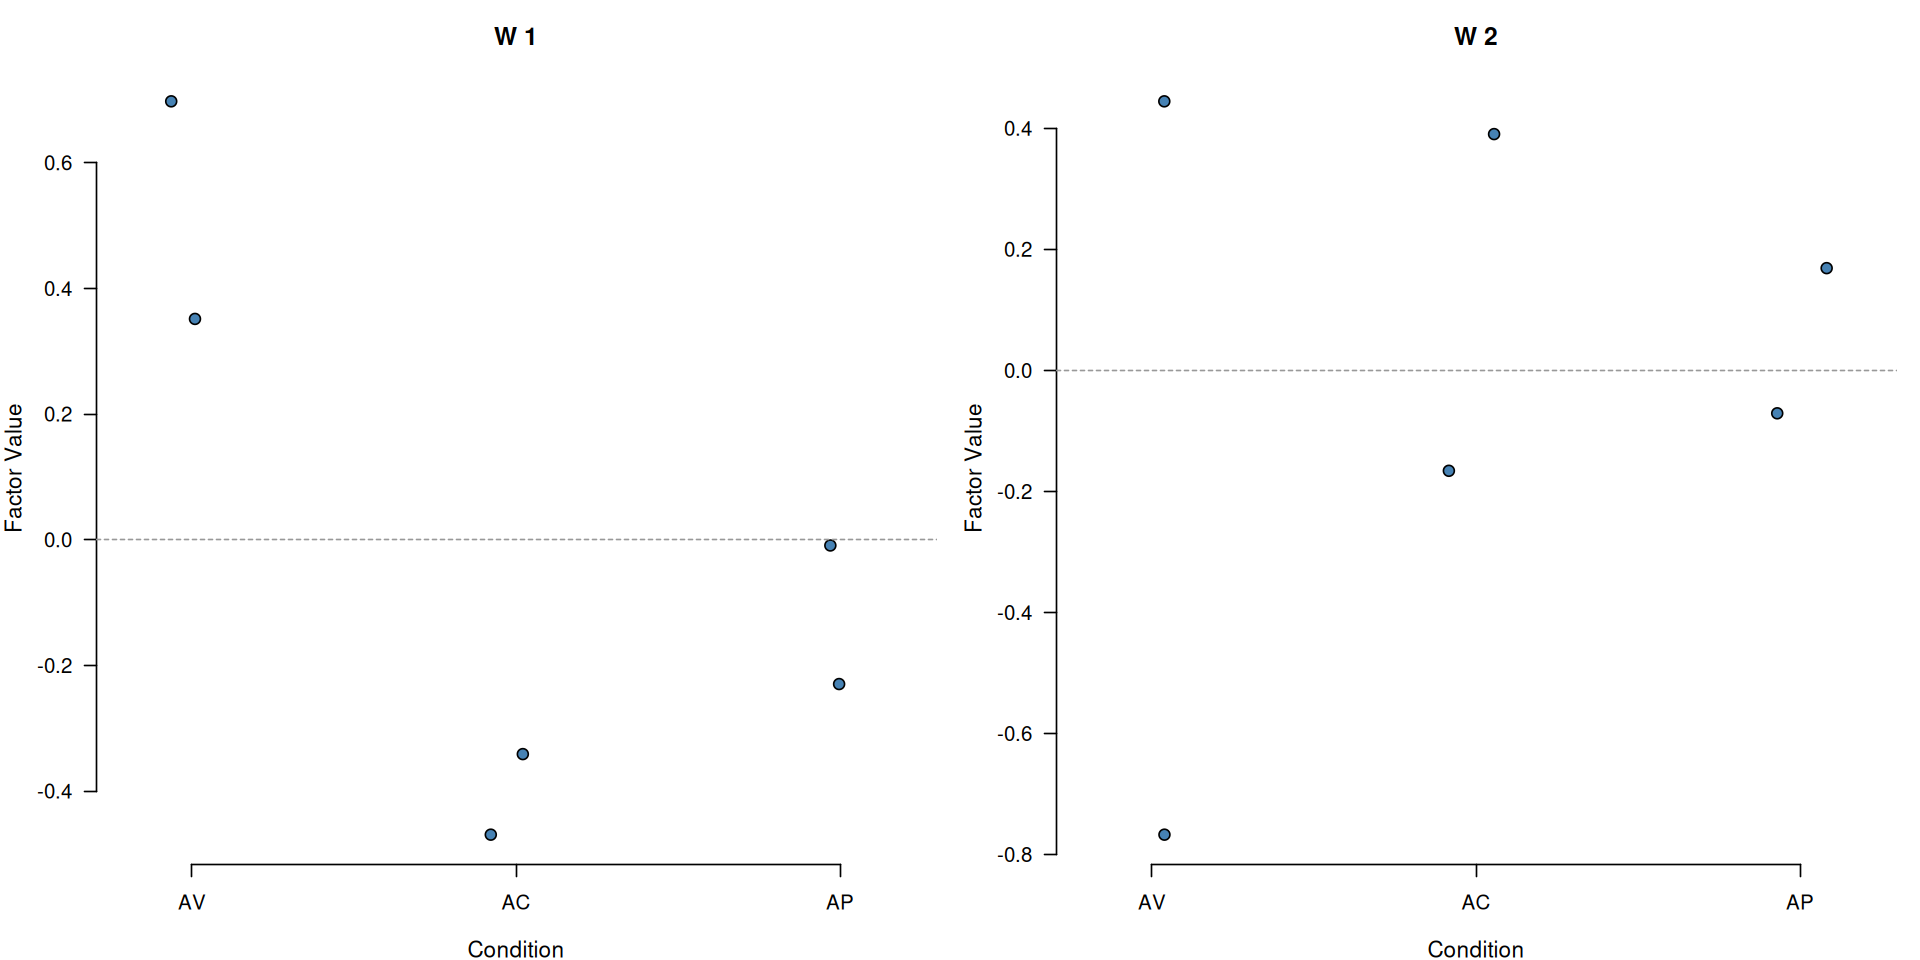

In [43]:
# Set layout to 1 row, 2 columns (side by side)
par(
  mfrow = c(1, 2),
  mar = c(4, 4, 3, 1),   # margins: bottom, left, top, right
  cex.main = 1.2,        # title size
  cex.axis = 1.0,        # axis tick label size
  cex.lab = 1.1,         # axis title size
  las = 1                # horizontal y-axis labels
)

# Loop over W1 and W2
for (i in 1:2) {
  stripchart(
    pData(set)[, i] ~ dds$condition,
    vertical = TRUE,
    method = "jitter",
    pch = 21,
    bg = "steelblue",
    col = "black",
    frame.plot = FALSE,
    main = paste("W", i),
    ylab = "Factor Value",
    xlab = "Condition",
    cex = 1.1
  )
  abline(h = 0, lty = 2, col = "gray60", lwd = 1)
}


using ntop=500 top features by variance

using ntop=500 top features by variance



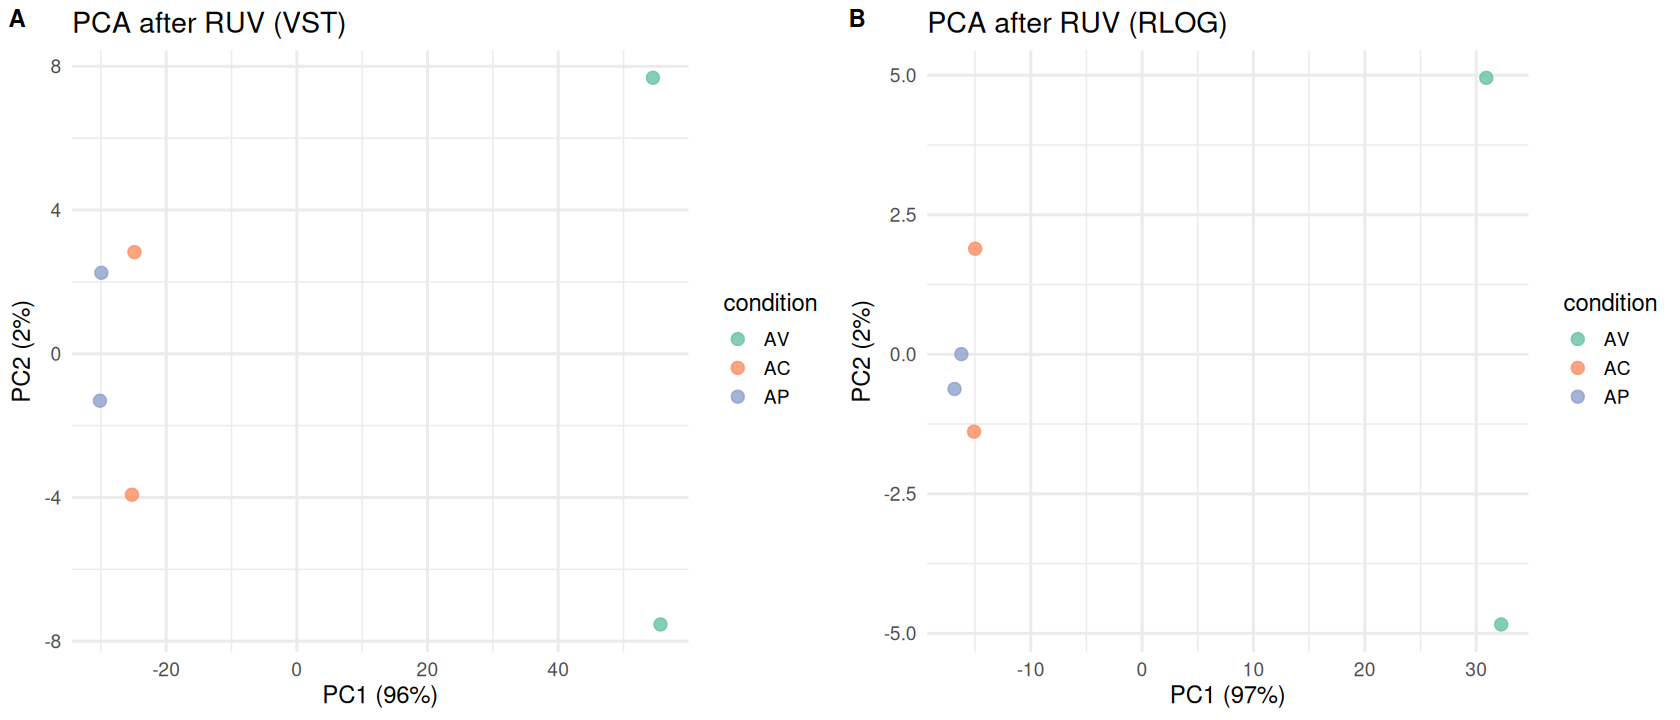

In [44]:
# Transform count data from ddsruv
vsd3 <- vst(ddsruv, blind = TRUE)
rld3 <- rlog(ddsruv, blind = TRUE)

# Get PCA data
pca_vsd <- plotPCA(vsd3, intgroup = "condition", returnData = TRUE)
pca_rld <- plotPCA(rld3, intgroup = "condition", returnData = TRUE)

# Variance explained
percentVar_vsd <- round(100 * attr(pca_vsd, "percentVar"))
percentVar_rld <- round(100 * attr(pca_rld, "percentVar"))

# PCA plot for VST
p1 <- ggplot(pca_vsd, aes(PC1, PC2, color = condition)) +
  geom_point(size = 3, alpha = 0.8) +
  labs(
    title = "PCA after RUV (VST)",
    x = paste0("PC1 (", percentVar_vsd[1], "%)"),
    y = paste0("PC2 (", percentVar_vsd[2], "%)")
  ) +
  theme_minimal(base_size = 14) +
  scale_color_brewer(palette = "Set2") +
  theme(legend.position = "right")

# PCA plot for RLOG
p2 <- ggplot(pca_rld, aes(PC1, PC2, color = condition)) +
  geom_point(size = 3, alpha = 0.8) +
  labs(
    title = "PCA after RUV (RLOG)",
    x = paste0("PC1 (", percentVar_rld[1], "%)"),
    y = paste0("PC2 (", percentVar_rld[2], "%)")
  ) +
  theme_minimal(base_size = 14) +
  scale_color_brewer(palette = "Set2") +
  theme(legend.position = "right")

# Show both plots side by side with legends
options(repr.plot.width = 14, repr.plot.height = 6)
plot_grid(p1, p2, labels = c("A", "B"), ncol = 2)

Warning message:
"ggrepel: 270 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


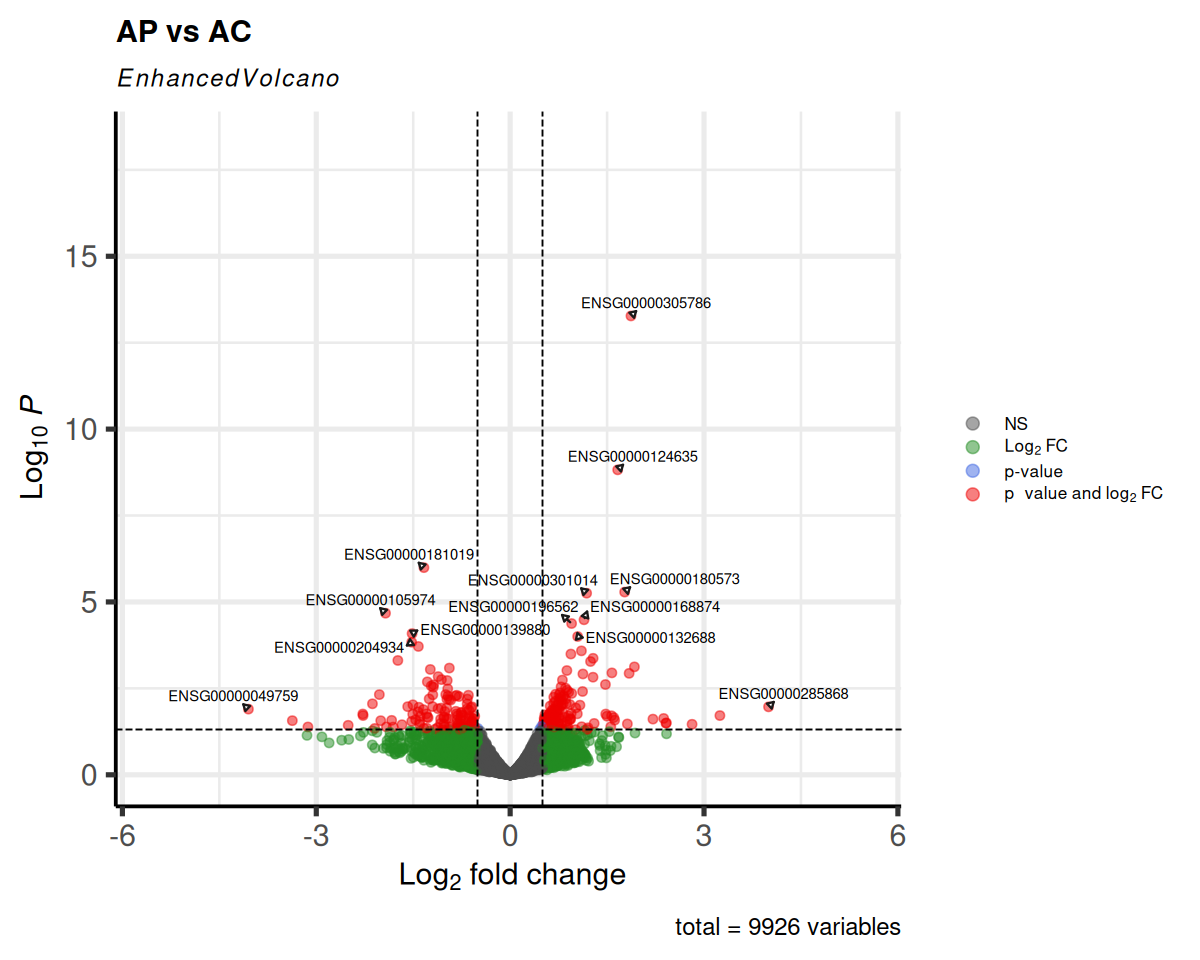

In [45]:
library(EnhancedVolcano)

# Color	Label in legend	Meaning
# Grey	NS	Not Significant – the gene did not pass the p-value or log₂FC thresholds
# Green	Log₂ FC	The gene passed the log₂ fold change cutoff but not the p-value cutoff
# Blue	p-value	The gene passed the p-value cutoff but not the log₂FC cutoff
# Red	p value and log₂ FC	The gene passed both p-value and log₂FC thresholds — most interesting hits

# Define thresholds
pval_cutoff <- 0.05
lfc_cutoff <- 0.5

# Set up the plotting window size for a more compact layout
options(repr.plot.width = 10, repr.plot.height = 8)

EnhancedVolcano(res_AP_vs_AC,
                lab = rownames(res_AP_vs_AC),
                x = 'log2FoldChange',
                y = 'pvalue',
                pCutoff = pval_cutoff,
                FCcutoff = lfc_cutoff,
                title = 'AP vs AC',
                pointSize = 2.0,
                labSize = 3.0,
                legendPosition = 'right',
                legendLabSize = 10,
                legendIconSize = 3.0,
                drawConnectors = TRUE,
                widthConnectors = 0.5,
                boxedLabels = FALSE)


In [46]:
library(clusterProfiler)
library(org.Hs.eg.db) 
library(GO.db)         
library(DO.db)         
library(KEGGREST)      
library(ReactomePA)    
library(enrichplot)    
library(dplyr)
library(msigdbr)
library(msigdb)
library(msigdf)
library(msigdbdf)

clusterProfiler v4.14.6 Learn more at https://yulab-smu.top/contribution-knowledge-mining/

Please cite:

S Xu, E Hu, Y Cai, Z Xie, X Luo, L Zhan, W Tang, Q Wang, B Liu, R Wang,
W Xie, T Wu, L Xie, G Yu. Using clusterProfiler to characterize
multiomics data. Nature Protocols. 2024, 19(11):3292-3320


Attaching package: 'clusterProfiler'


The following object is masked from 'package:XVector':

    slice


The following object is masked from 'package:purrr':

    simplify


The following object is masked from 'package:IRanges':

    slice


The following object is masked from 'package:S4Vectors':

    rename


The following object is masked from 'package:stats':

    filter


Loading required package: AnnotationDbi


Attaching package: 'AnnotationDbi'


The following object is masked from 'package:clusterProfiler':

    select


The following object is masked from 'package:dplyr':

    select




ReactomePA v1.50.0 Learn more at https://yulab-smu.top/contribution-knowledge-mining/

Plea

In [47]:
# Define thresholds
pval_cutoff <- 0.05
lfc_cutoff <- 0.5
fin_name = "A549.peaks.IP.samples."

In [48]:
res <- res_AP_vs_AC  
head(res,3)

log2 fold change (MLE): condition AP vs AC 
Wald test p-value: condition AP vs AC 
DataFrame with 3 rows and 6 columns
                 baseMean log2FoldChange     lfcSE      stat    pvalue
                <numeric>      <numeric> <numeric> <numeric> <numeric>
ENSG00000310528   11.6073      -0.173593  0.892624 -0.194475  0.845804
ENSG00000310527   30.2152      -0.335411  0.575978 -0.582332  0.560343
ENSG00000225880  415.7271       0.148345  0.345264  0.429656  0.667446
                     padj
                <numeric>
ENSG00000310528        NA
ENSG00000310527        NA
ENSG00000225880  0.999238

In [49]:
# Filter significant genes
res_sig <- as.data.frame(res) %>%
  rownames_to_column("gene") %>%
  filter(padj < pval_cutoff & abs(log2FoldChange) > lfc_cutoff)

# Map ENSEMBL IDs to Entrez IDs
gene_ids <- bitr(res_sig$gene, fromType = "ENSEMBL", toType = "ENTREZID", OrgDb = org.Hs.eg.db)
res_merge <- merge(res_sig, gene_ids, by.x = "gene", by.y = "ENSEMBL")

# Prepare named gene list for GSEA
gene_list2 <- setNames(res_merge$log2FoldChange, res_merge$ENTREZID)
gene_list2 <- sort(gene_list2, decreasing = TRUE)

head(gene_list2, 2)
length(gene_list2)

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(res_sig$gene, fromType = "ENSEMBL", toType = "ENTREZID", :
"25% of input gene IDs are fail to map..."


8334     8970 
1.771869 1.664214

[1] 6

using 'fgsea' for GSEA analysis, please cite Korotkevich et al (2019).


preparing geneSet collections...

GSEA analysis...

no term enriched under specific pvalueCutoff...



No enriched terms in GSEA under pvalueCutoff.


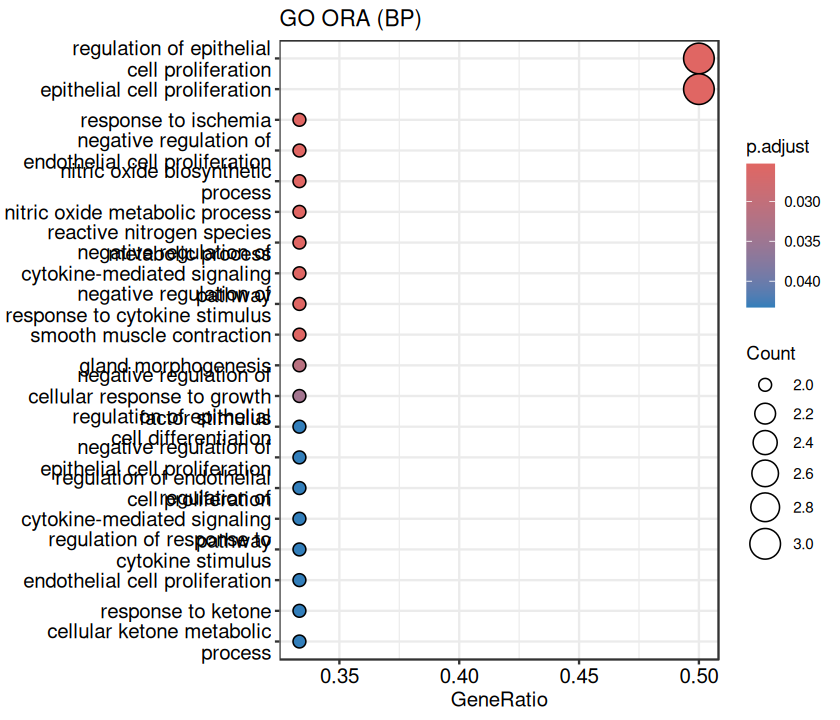

In [56]:
library(clusterProfiler)
library(org.Hs.eg.db)
library(cowplot)

# Predefine result objects to avoid "not found" error
result <- NULL
result2 <- NULL

# GO Over-Representation Analysis (ORA)
result <- tryCatch({
  ego <- enrichGO(gene          = gene_ids$ENTREZID,
                  OrgDb         = org.Hs.eg.db,
                  ont           = "BP",
                  keyType       = "ENTREZID",  
                  pAdjustMethod = "BH",
                  pvalueCutoff  = 0.05,
                  qvalueCutoff  = 1,
                  readable      = TRUE)
  
  # Save results
  write.table(ego@result, file = paste0(fin_name, "_GO_OverRepresentation_Results.txt"), 
              row.names = FALSE, col.names = TRUE, quote = FALSE)

  # Save PNG
  png(paste0(fin_name, "_GO_OverRepresentation.png"), width = 1000, height = 800)
  print(dotplot(ego, showCategory = 20, title = "GO ORA (BP)"))
  dev.off()

  # Return ggplot object
  dotplot(ego, showCategory = 20, title = "GO ORA (BP)")

}, error = function(e) {
  cat("Error in GO ORA:", conditionMessage(e), "\n")
  NULL
})


# GO Enrichment Analysis (GSEA)
result2 <- tryCatch({
  ego2 <- gseGO(gene          = gene_list2,
                OrgDb         = org.Hs.eg.db,
                keyType       = "ENTREZID",  
                ont           = "BP",
                pAdjustMethod = "BH",
                pvalueCutoff  = 0.05)

  if (nrow(ego2@result) > 0) {
    write.table(ego2@result, file = paste0(fin_name, "_GO_Enrichment_Results.txt"), 
                row.names = FALSE, col.names = TRUE, quote = FALSE)

    png(paste0(fin_name, "_GO_Enrichment_Plot.png"), width = 1000, height = 800)
    print(dotplot(ego2, showCategory = 20, title = "GO GSEA (BP)"))
    dev.off()

    dotplot(ego2, showCategory = 20, title = "GO GSEA (BP)")
  } else {
    cat("No enriched terms in GSEA under pvalueCutoff.\n")
    NULL
  }

}, error = function(e) {
  cat("Error in GO GSEA:", conditionMessage(e), "\n")
  NULL
})

# === Display plots side by side if both exist ===
options(repr.plot.width = 8, repr.plot.height = 24)

if (!is.null(result) && !is.null(result2)) {
  plot_grid(result, result2, labels = c("A", "B"), ncol = 2, rel_widths = c(1, 1))
} else if (!is.null(result)) {
  options(repr.plot.width = 7, repr.plot.height = 6)
  print(result)
} else if (!is.null(result2)) {
  options(repr.plot.width = 7, repr.plot.height = 6)
  print(result2)
} else {
  cat("No enrichment plots to display.\n")
}


Reading KEGG annotation online: "https://rest.kegg.jp/link/hsa/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/hsa"...

no term enriched under specific pvalueCutoff...



⚠️ No enriched KEGG terms found in GSEA.


NULL

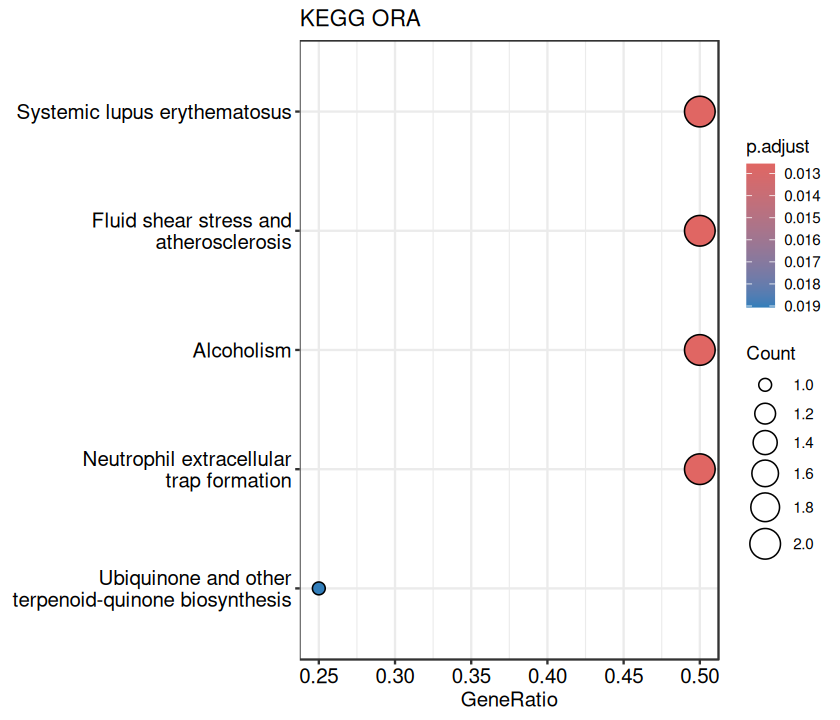

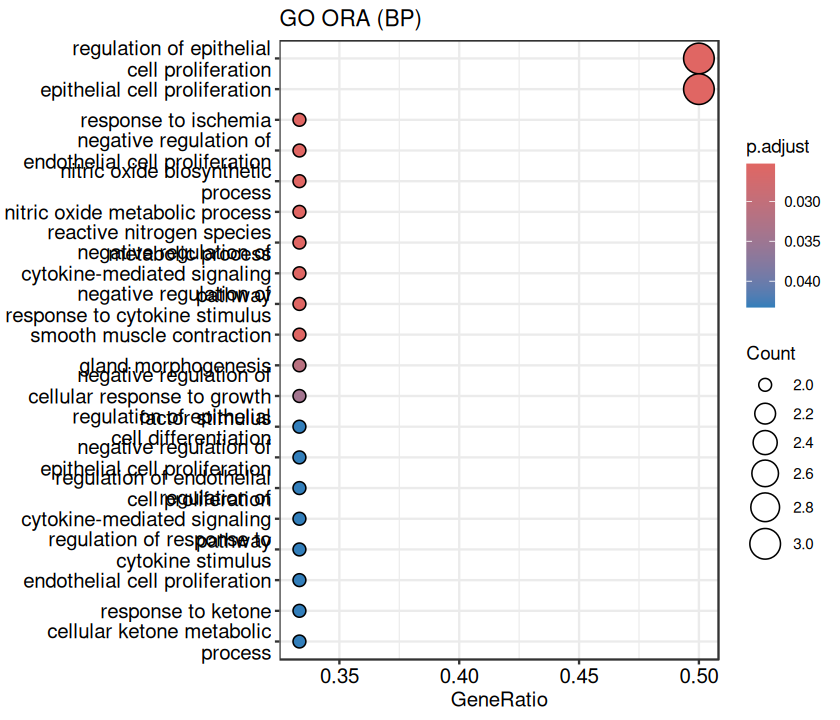

In [51]:
# === KEGG Over-Representation Analysis (ORA) ===
result <- tryCatch({

  kegg_enrich <- enrichKEGG(
    gene           = gene_ids$ENTREZID,
    organism       = "hsa",
    pAdjustMethod  = "BH",
    pvalueCutoff   = 0.05
  )

  if (!is.null(kegg_enrich) && nrow(kegg_enrich@result) > 0) {

    # Save results
    write.table(kegg_enrich@result,
                file = paste0(fin_name, "_KEGG_OverRepresentation_Results.txt"),
                sep = "\t", row.names = FALSE, quote = FALSE)

    # Save PNG plot
    png(paste0(fin_name, "_KEGG_OverRepresentation_Plot.png"), width = 1000, height = 800)
    print(dotplot(kegg_enrich, showCategory = 20, title = "KEGG ORA"))
    dev.off()

    # Return plot object
    return(dotplot(kegg_enrich, showCategory = 20, title = "KEGG ORA"))

  } else {
    cat("⚠️ No enriched KEGG terms found in ORA.\n")
    return(NULL)
  }

}, error = function(e) {
  cat("❌ Error in KEGG ORA:", conditionMessage(e), "\n")
  return(NULL)
})



# === KEGG Gene Set Enrichment Analysis (GSEA) ===
result2 <- tryCatch({

  kegg_gse <- gseKEGG(
    geneList      = gene_list2,
    organism      = "hsa",
    minGSSize     = 120,
    pvalueCutoff  = 0.05,
    verbose       = FALSE
  )

  if (!is.null(kegg_gse) && nrow(kegg_gse@result) > 0) {

    # Save results
    write.table(kegg_gse@result,
                file = paste0(fin_name, "_KEGG_Enrichment_Results.txt"),
                sep = "\t", row.names = FALSE, quote = FALSE)

    # Save PNG plot
    png(paste0(fin_name, "_KEGG_Enrichment_Plot.png"), width = 1000, height = 800)
    print(dotplot(kegg_gse, showCategory = 20, title = "KEGG GSEA"))
    dev.off()

    # Return plot object
    return(dotplot(kegg_gse, showCategory = 20, title = "KEGG GSEA"))

  } else {
    cat("⚠️ No enriched KEGG terms found in GSEA.\n")
    return(NULL)
  }

}, error = function(e) {
  cat("❌ Error in KEGG GSEA:", conditionMessage(e), "\n")
  return(NULL)
})



# === Display Plots Nicely ===
# Set default figure size
options(repr.plot.width = 6, repr.plot.height = 6)

if (!is.null(result) && !is.null(result2)) {
  # Side-by-side
  options(repr.plot.width = 12, repr.plot.height = 6)
  plot_grid(result, result2, labels = c("A", "B"), ncol = 2, rel_widths = c(1, 1))

} else if (!is.null(result)) {
  options(repr.plot.width = 7, repr.plot.height = 6)
  print(result)

} else if (!is.null(result2)) {
  options(repr.plot.width = 7, repr.plot.height = 6)
  print(result2)

} else {
  cat("⚠️ No KEGG enrichment plots to display.\n")
}


##############################################################################
Pathview is an open source software package distributed under GNU General
Public License version 3 (GPLv3). Details of GPLv3 is available at
http://www.gnu.org/licenses/gpl-3.0.html. Particullary, users are required to
formally cite the original Pathview paper (not just mention it) in publications
or products. For details, do citation("pathview") within R.

The pathview downloads and uses KEGG data. Non-academic uses may require a KEGG
license agreement (details at http://www.kegg.jp/kegg/legal.html).
##############################################################################

DOSE v4.0.0 Learn more at https://yulab-smu.top/contribution-knowledge-mining/

Please cite:

Guangchuang Yu, Li-Gen Wang, Guang-Rong Yan, Qing-Yu He. DOSE: an
R/Bioconductor package for Disease Ontology Semantic and Enrichment
analysis. Bioinformatics. 2015, 31(4):608-609


Attaching package: 'rWikiPathways'


The following object 

⚠️ No enriched WikiPathways terms found in GSEA.


NULL

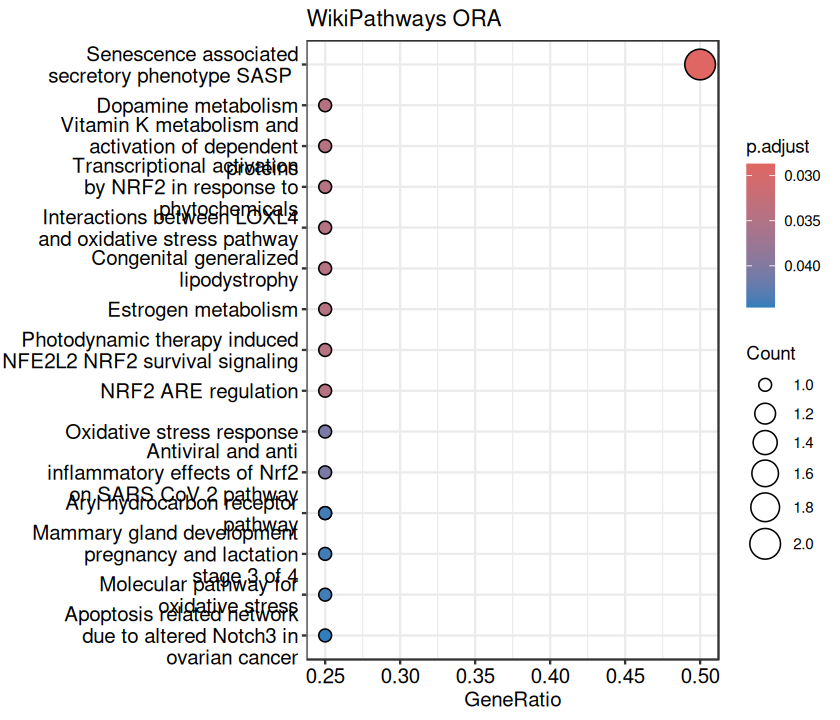

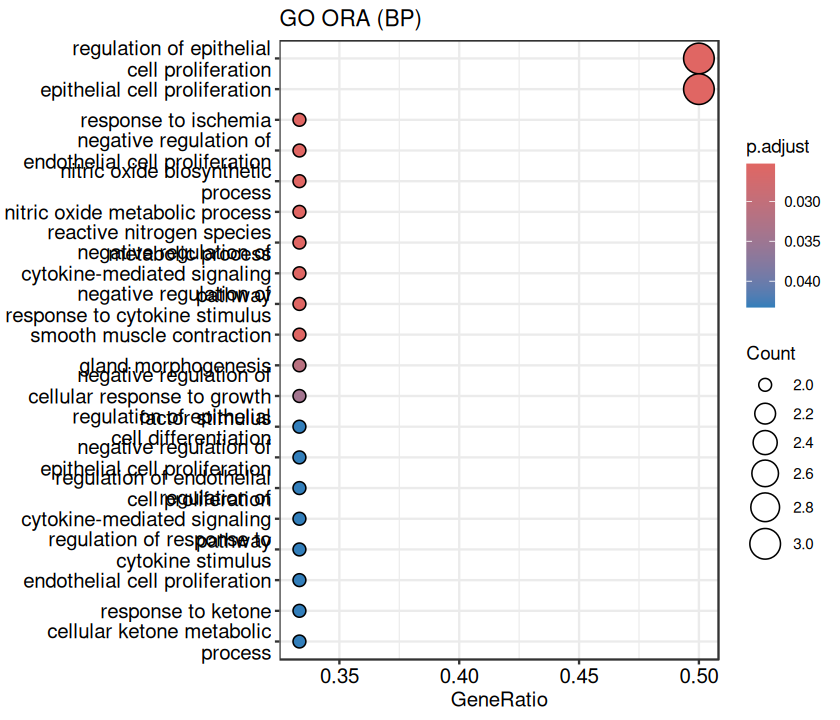

In [52]:
library(clusterProfiler)
library(enrichplot)
library(cowplot)
library(pathview)         # Optional for WikiPathways
library(dplyr)
library(DOSE)
library(rWikiPathways)

# === WikiPathways Over-Representation Analysis (ORA) ===
result <- tryCatch({

  wikipathways_enrich <- enrichWP(
    gene           = gene_ids$ENTREZID,
    organism       = "Homo sapiens",
    pvalueCutoff   = 0.05
  )

  if (!is.null(wikipathways_enrich) && nrow(wikipathways_enrich@result) > 0) {

    # Save results
    write.table(wikipathways_enrich@result,
                file = paste0(fin_name, "_WikiPathways_ORA_Results.txt"),
                sep = "\t", row.names = FALSE, quote = FALSE)

    # Save plot
    png(paste0(fin_name, "_WikiPathways_ORA_Plot.png"), width = 1000, height = 800)
    print(dotplot(wikipathways_enrich, showCategory = 20, title = "WikiPathways ORA"))
    dev.off()

    # Return plot object
    return(dotplot(wikipathways_enrich, showCategory = 20, title = "WikiPathways ORA"))

  } else {
    cat("⚠️ No enriched WikiPathways terms found in ORA.\n")
    return(NULL)
  }

}, error = function(e) {
  cat("❌ Error in WikiPathways ORA:", conditionMessage(e), "\n")
  return(NULL)
})



# === WikiPathways Gene Set Enrichment Analysis (GSEA) ===
result2 <- tryCatch({

  wikipathways_gse <- gseWP(
    gene          = gene_list2,
    organism      = "Homo sapiens",
    pvalueCutoff  = 0.05
  )

  if (!is.null(wikipathways_gse) && nrow(wikipathways_gse@result) > 0) {

    # Save results
    write.table(wikipathways_gse@result,
                file = paste0(fin_name, "_WikiPathways_Enrichment_Results.txt"),
                sep = "\t", row.names = FALSE, quote = FALSE)

    # Save plot
    png(paste0(fin_name, "_WikiPathways_Enrichment_Plot.png"), width = 1000, height = 800)
    print(dotplot(wikipathways_gse, showCategory = 20, title = "WikiPathways GSEA"))
    dev.off()

    # Return plot object
    return(dotplot(wikipathways_gse, showCategory = 20, title = "WikiPathways GSEA"))

  } else {
    cat("⚠️ No enriched WikiPathways terms found in GSEA.\n")
    return(NULL)
  }

}, error = function(e) {
  cat("❌ Error in WikiPathways GSEA:", conditionMessage(e), "\n")
  return(NULL)
})



# === Display plots ===
options(repr.plot.width = 5, repr.plot.height = 5)  # Default size

if (!is.null(result) && !is.null(result2)) {
  # Show both plots side-by-side
  options(repr.plot.width = 12, repr.plot.height = 6)
  plot_grid(result, result2, labels = c("A", "B"), ncol = 2, rel_widths = c(1, 1))

} else if (!is.null(result)) {
  options(repr.plot.width = 7, repr.plot.height = 6)
  print(result)

} else if (!is.null(result2)) {
  options(repr.plot.width = 7, repr.plot.height = 6)
  print(result2)

} else {
  cat("⚠️ No WikiPathways enrichment plots to display.\n")
}


using 'fgsea' for GSEA analysis, please cite Korotkevich et al (2019).


preparing geneSet collections...

GSEA analysis...

no term enriched under specific pvalueCutoff...



⚠️ No enriched Reactome terms found in GSEA.


NULL

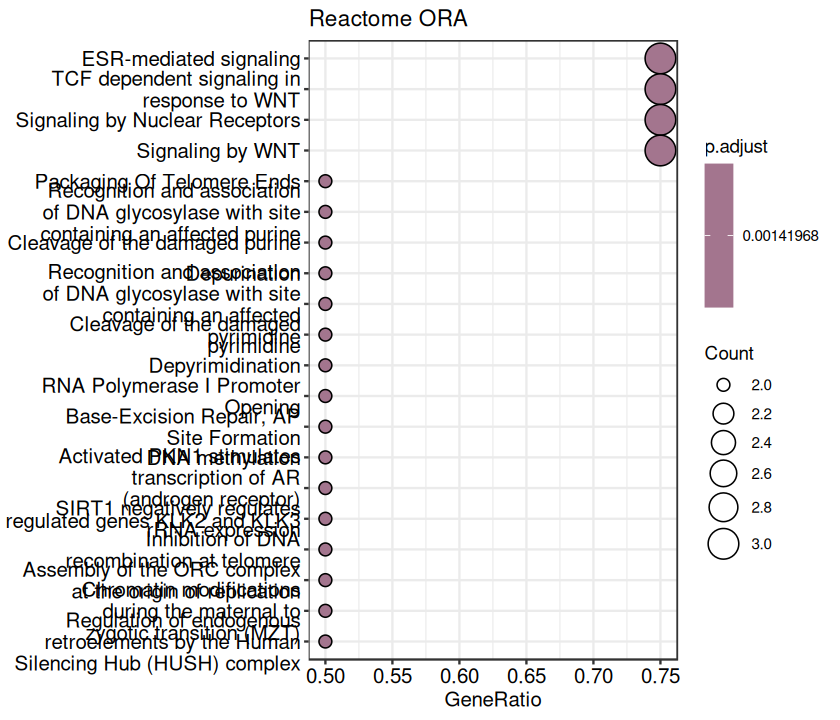

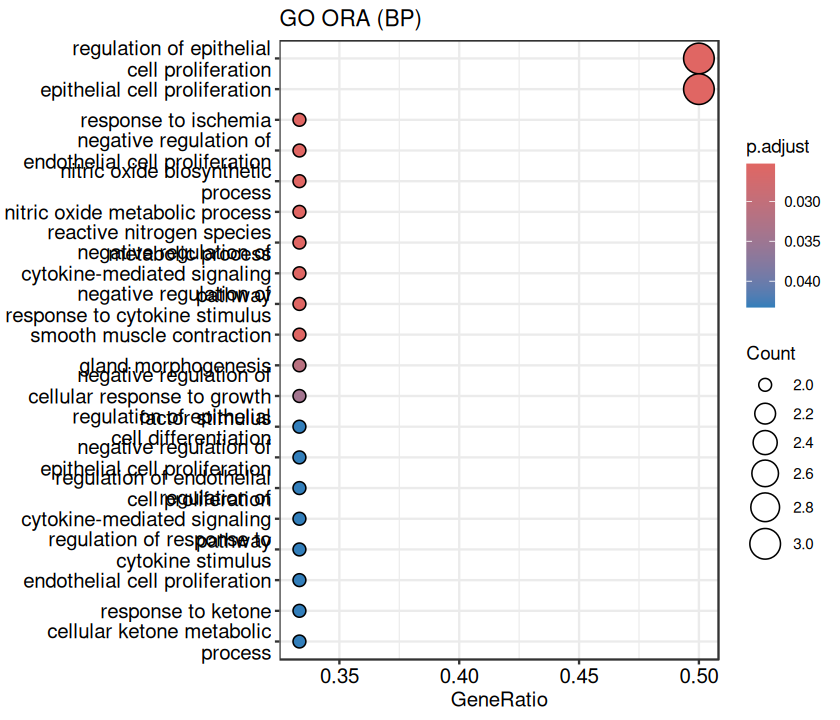

In [53]:
library(ReactomePA)
library(clusterProfiler)
library(enrichplot)
library(cowplot)

# === Reactome Over-Representation Analysis (ORA) ===
result <- tryCatch({

  reactome_ora <- enrichPathway(
    gene           = gene_ids$ENTREZID,
    organism       = "human",
    pAdjustMethod  = "BH",
    pvalueCutoff   = 0.05
  )

  if (!is.null(reactome_ora) && nrow(reactome_ora@result) > 0) {

    # Save results
    write.table(reactome_ora@result,
                file = paste0(fin_name, "_Reactome_ORA_Results.txt"),
                sep = "\t", row.names = FALSE, quote = FALSE)

    # Save plot
    png(paste0(fin_name, "_Reactome_ORA_Plot.png"), width = 1000, height = 800)
    print(dotplot(reactome_ora, showCategory = 20, title = "Reactome ORA"))
    dev.off()

    # Return plot for screen
    return(dotplot(reactome_ora, showCategory = 20, title = "Reactome ORA"))

  } else {
    cat("⚠️ No enriched Reactome terms found in ORA.\n")
    return(NULL)
  }

}, error = function(e) {
  cat("❌ Error in Reactome ORA:", conditionMessage(e), "\n")
  return(NULL)
})


# === Reactome GSEA Analysis ===
result2 <- tryCatch({

  reactome_gsea <- gsePathway(
    gene            = gene_list2,
    organism        = "human",
    pAdjustMethod   = "BH",
    pvalueCutoff    = 0.05
  )

  if (!is.null(reactome_gsea) && nrow(reactome_gsea@result) > 0) {

    # Save results
    write.table(reactome_gsea@result,
                file = paste0(fin_name, "_Reactome_Enrichment_Results.txt"),
                sep = "\t", row.names = FALSE, quote = FALSE)

    # Save plot
    png(paste0(fin_name, "_Reactome_Enrichment_Plot.png"), width = 1000, height = 800)
    print(dotplot(reactome_gsea, showCategory = 20, title = "Reactome GSEA"))
    dev.off()

    # Return plot for screen
    return(dotplot(reactome_gsea, showCategory = 20, title = "Reactome GSEA"))

  } else {
    cat("⚠️ No enriched Reactome terms found in GSEA.\n")
    return(NULL)
  }

}, error = function(e) {
  cat("❌ Error in Reactome GSEA:", conditionMessage(e), "\n")
  return(NULL)
})


# === Display plots ===
options(repr.plot.width = 8, repr.plot.height = 6)

if (!is.null(result) && !is.null(result2)) {
  # Show both side-by-side
  options(repr.plot.width = 12, repr.plot.height = 6)
  plot_grid(result, result2, labels = c("A", "B"), ncol = 2, rel_widths = c(1, 1))

} else if (!is.null(result)) {
  options(repr.plot.width = 7, repr.plot.height = 6)
  print(result)

} else if (!is.null(result2)) {
  options(repr.plot.width = 7, repr.plot.height = 6)
  print(result2)

} else {
  cat("⚠️ No Reactome enrichment plots to display.\n")
}


Warning message:
"The `category` argument of `msigdbr()` is deprecated as of msigdbr 9.0.0.
ℹ Please use the `collection` argument instead."
using 'fgsea' for GSEA analysis, please cite Korotkevich et al (2019).


preparing geneSet collections...

GSEA analysis...

no term enriched under specific pvalueCutoff...



⚠️ No significant MSigDB GSEA pathways found.


NULL

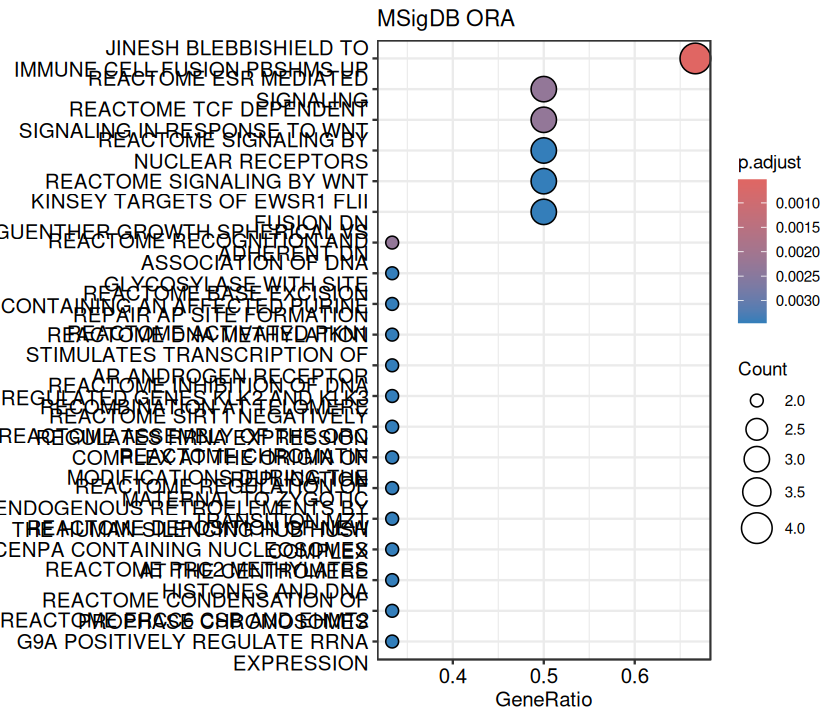

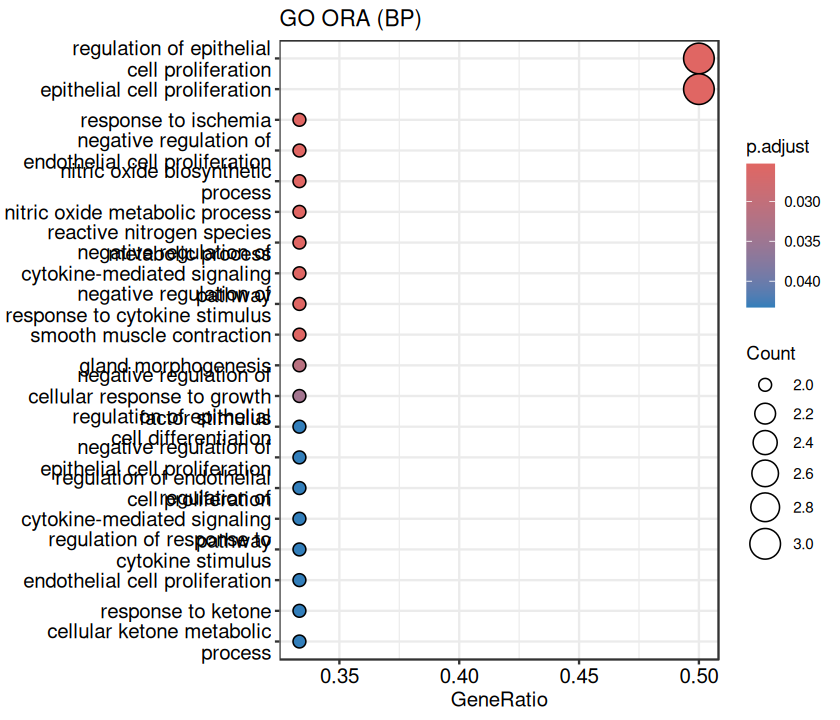

In [54]:
library(msigdbr)
library(clusterProfiler)
library(enrichplot)
library(cowplot)
library(dplyr)

# === Prepare MSigDB C2 gene sets ===
msig_genesets <- msigdbr(species = "Homo sapiens", category = "C2")
C2_t2g <- msig_genesets %>% dplyr::select(gs_name, entrez_gene)

# Use gene_ids$ENTREZID for ORA, and named gene_list2 for GSEA
gene_list <- gene_ids$ENTREZID  # for ORA

# === MSigDB Over-Representation Analysis (ORA) ===
result <- tryCatch({

  msig_enrich <- enricher(
    gene       = gene_list,
    TERM2GENE  = C2_t2g
  )

  if (!is.null(msig_enrich) && nrow(msig_enrich@result) > 0) {

    write.table(msig_enrich@result,
                file = paste0(fin_name, "_MSigDB_OverRepresentation_Results.txt"),
                sep = "\t", row.names = FALSE, quote = FALSE)

    png(paste0(fin_name, "_MSigDB_ORA_Plot.png"), width = 1000, height = 800)
    print(dotplot(msig_enrich, showCategory = 20, title = "MSigDB ORA"))
    dev.off()

    return(dotplot(msig_enrich, showCategory = 20, title = "MSigDB ORA"))

  } else {
    cat("⚠️ No significant MSigDB pathways found in ORA.\n")
    return(NULL)
  }

}, error = function(e) {
  cat("❌ Error in MSigDB ORA:", conditionMessage(e), "\n")
  return(NULL)
})


# === MSigDB Gene Set Enrichment Analysis (GSEA) ===
result2 <- tryCatch({

  msig_gsea <- GSEA(
    geneList   = gene_list2,
    TERM2GENE  = C2_t2g,
    pvalueCutoff = 0.05
  )

  if (!is.null(msig_gsea) && nrow(msig_gsea@result) > 0) {

    write.table(msig_gsea@result,
                file = paste0(fin_name, "_MSigDB_GSEA_Results.txt"),
                sep = "\t", row.names = FALSE, quote = FALSE)

    png(paste0(fin_name, "_MSigDB_GSEA_Plot.png"), width = 1000, height = 800)
    print(dotplot(msig_gsea, showCategory = 20, title = "MSigDB GSEA"))
    dev.off()

    return(dotplot(msig_gsea, showCategory = 20, title = "MSigDB GSEA"))

  } else {
    cat("⚠️ No significant MSigDB GSEA pathways found.\n")
    return(NULL)
  }

}, error = function(e) {
  cat("❌ Error in MSigDB GSEA:", conditionMessage(e), "\n")
  return(NULL)
})


# === Display plots ===
options(repr.plot.width = 20, repr.plot.height = 24)

if (!is.null(result) && !is.null(result2)) {
  options(repr.plot.width = 12, repr.plot.height = 6)
  plot_grid(result, result2, labels = c("A", "B"), ncol = 2, rel_widths = c(1, 1))

} else if (!is.null(result)) {
  options(repr.plot.width = 7, repr.plot.height = 6)
  print(result)

} else if (!is.null(result2)) {
  options(repr.plot.width = 7, repr.plot.height = 6)
  print(result2)

} else {
  cat("⚠️ No MSigDB enrichment plots to display.\n")
}


using 'fgsea' for GSEA analysis, please cite Korotkevich et al (2019).


preparing geneSet collections...

GSEA analysis...

no term enriched under specific pvalueCutoff...



⚠️ No significant MSigDB GSEA pathways found.


NULL

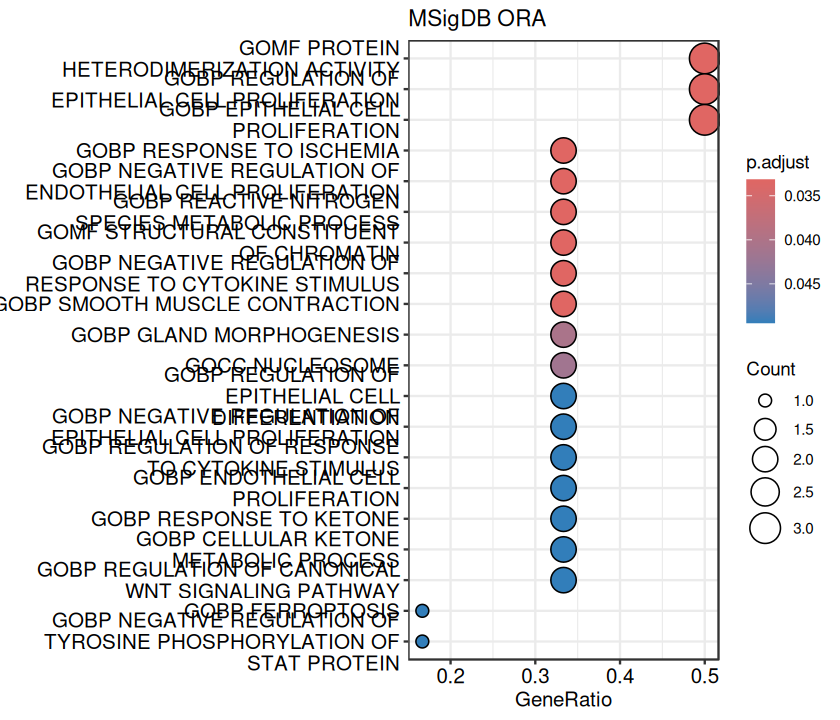

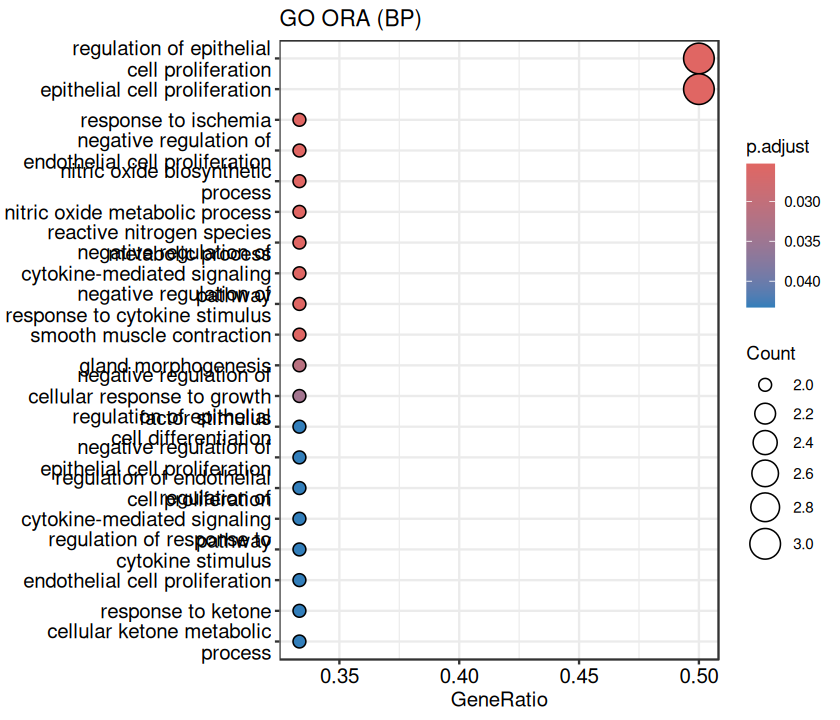

In [55]:
library(msigdbr)
library(clusterProfiler)
library(enrichplot)
library(cowplot)
library(dplyr)

# === Prepare MSigDB C2 gene sets ===
msig_genesets <- msigdbr(species = "Homo sapiens", category = "C5")
C2_t2g <- msig_genesets %>% dplyr::select(gs_name, entrez_gene)

# Use gene_ids$ENTREZID for ORA, and named gene_list2 for GSEA
gene_list <- gene_ids$ENTREZID  # for ORA

# === MSigDB Over-Representation Analysis (ORA) ===
result <- tryCatch({

  msig_enrich <- enricher(
    gene       = gene_list,
    TERM2GENE  = C2_t2g
  )

  if (!is.null(msig_enrich) && nrow(msig_enrich@result) > 0) {

    write.table(msig_enrich@result,
                file = paste0(fin_name, "_MSigDB_OverRepresentation_Results.txt"),
                sep = "\t", row.names = FALSE, quote = FALSE)

    png(paste0(fin_name, "_MSigDB_ORA_Plot.png"), width = 1000, height = 800)
    print(dotplot(msig_enrich, showCategory = 20, title = "MSigDB ORA"))
    dev.off()

    return(dotplot(msig_enrich, showCategory = 20, title = "MSigDB ORA"))

  } else {
    cat("⚠️ No significant MSigDB pathways found in ORA.\n")
    return(NULL)
  }

}, error = function(e) {
  cat("❌ Error in MSigDB ORA:", conditionMessage(e), "\n")
  return(NULL)
})


# === MSigDB Gene Set Enrichment Analysis (GSEA) ===
result2 <- tryCatch({

  msig_gsea <- GSEA(
    geneList   = gene_list2,
    TERM2GENE  = C2_t2g,
    pvalueCutoff = 0.05
  )

  if (!is.null(msig_gsea) && nrow(msig_gsea@result) > 0) {

    write.table(msig_gsea@result,
                file = paste0(fin_name, "_MSigDB_GSEA_Results.txt"),
                sep = "\t", row.names = FALSE, quote = FALSE)

    png(paste0(fin_name, "_MSigDB_GSEA_Plot.png"), width = 1000, height = 800)
    print(dotplot(msig_gsea, showCategory = 20, title = "MSigDB GSEA"))
    dev.off()

    return(dotplot(msig_gsea, showCategory = 20, title = "MSigDB GSEA"))

  } else {
    cat("⚠️ No significant MSigDB GSEA pathways found.\n")
    return(NULL)
  }

}, error = function(e) {
  cat("❌ Error in MSigDB GSEA:", conditionMessage(e), "\n")
  return(NULL)
})


# === Display plots ===
options(repr.plot.width = 10, repr.plot.height = 10)

if (!is.null(result) && !is.null(result2)) {
  options(repr.plot.width = 12, repr.plot.height = 6)
  plot_grid(result, result2, labels = c("A", "B"), ncol = 2, rel_widths = c(1, 1))

} else if (!is.null(result)) {
  options(repr.plot.width = 7, repr.plot.height = 6)
  print(result)

} else if (!is.null(result2)) {
  options(repr.plot.width = 7, repr.plot.height = 6)
  print(result2)

} else {
  cat("⚠️ No MSigDB enrichment plots to display.\n")
}
